In [1]:
import gizmo_analysis as gizmo
import utilities as ut

from func import *
from IPython.utils import io

In [2]:
import matplotlib as mpl
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import colors

fontsize = 12

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['patch.linewidth'] = 1


# read particle data

In [3]:
merger_directory = '/scratch/gpfs/mlisanti/Selfcons--80-50--8-140--50-30/'

cdm_directory = merger_directory + 'CDM'
sidm1_directory = merger_directory + 'SIDM1'
cdm2_directory = merger_directory +  'SIDM1CDMic'  #CDM physics, host ic = SIDM1, sat ic = CDM
cdm3_directory = merger_directory +  'SIDM1ic'   #CDM physics, host ic = SIDM1, sat ic = SIDM1 
#plot_directory = merger_directory +  'plots/'

unit_time = 0.978 # [Gyr], as set in Gadget
start_time = 0
end_time = 10
time_step = 0.1 
time_array = np.arange(start_time, end_time+1, time_step)*unit_time

n_dm1 = 1000000
n_star1 = 100000

n_dm2 = 180000
n_star2 = 21000

In [4]:
cdm_host, cdm_sat = create_galaxy_arrays(cdm_directory, n_dm1, n_star1, n_dm2, n_star2, time_array)
print(len(cdm_host), len(cdm_sat))

26 26


In [5]:
sidm1_host, sidm1_sat = create_galaxy_arrays(sidm1_directory, n_dm1, n_star1, n_dm2, n_star2, time_array)
print(len(sidm1_host), len(sidm1_sat))

26 26


In [6]:
cdm_sc_host, cdm_sc_sat = create_galaxy_arrays(cdm2_directory, n_dm1, n_star1, n_dm2, n_star2, time_array)
print(len(cdm_sc_host), len(cdm_sc_sat))

10 10


In [6]:
cdm_ss_host, cdm_ss_sat = create_galaxy_arrays(cdm3_directory, n_dm1, n_star1, n_dm2, n_star2, time_array)
print(len(cdm_ss_host), len(cdm_ss_sat))

26 26


In [7]:
time_samples = time_array[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99] ] #time_array[range(0, 101, 10)]
print(time_samples)

[0.     0.0978 0.1956 0.2934 0.3912 0.489  0.5868 0.6846 0.7824 0.8802
 0.978  1.0758 1.1736 1.2714 1.3692 1.467  8.802  8.8998 8.9976 9.0954
 9.1932 9.291  9.3888 9.4866 9.5844 9.6822]


# Plot Density Profiles

In [8]:
def make_density_hist(ls, min_radius, max_radius, nbins):

    hist, bin_edges = np.histogram(ls['position.sph'][:,0], bins=10 ** np.linspace(np.log10(min_radius), np.log10(max_radius), nbins), weights=ls['mass'])
    Rminlist = bin_edges[:-1]
    Rmaxlist = bin_edges[1:]
    Rcenterlist = (Rmaxlist + Rminlist)/2
    shell_vol_list = 4*math.pi*(Rmaxlist**3 - Rminlist**3)/3
    return Rcenterlist, np.divide(hist, shell_vol_list)


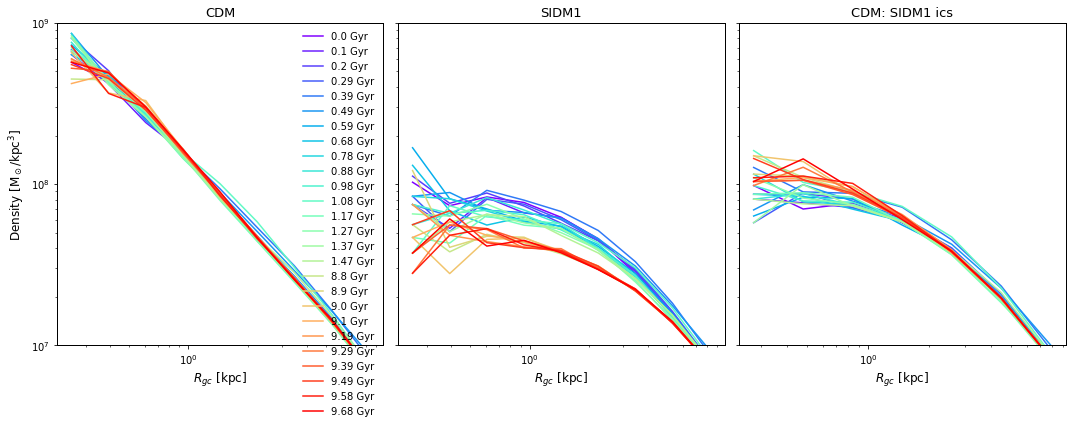

In [9]:
f, axs = plt.subplots(1, 3, sharey=True, sharex=False, figsize=(15, 6),)

ilist=range(len(cdm_host))

for i in ilist:

    colors = plt.cm.rainbow(np.linspace(0,1,max(ilist)+1))
    
    xlist_CDM, ylist_CDM = make_density_hist(cdm_host[i]['dark'], 0.2, 10, 10)
    axs[0].plot(xlist_CDM, ylist_CDM, color=colors[i], label=str(round(time_samples[i],2)) + ' Gyr', linewidth=1.5)
    
    xlist_SIDM1, ylist_SIDM1 = make_density_hist(sidm1_host[i]['dark'], 0.2, 10, 10)
    axs[1].plot(xlist_SIDM1, ylist_SIDM1, color=colors[i], label=str(round(time_samples[i],2)) + ' Gyr', linewidth=1.5)
    #axs[1].plot(xlist_CDM, ylist_CDM, color=colors[i], label=str(round(time_samples[i],2)) + ' Gyr', linewidth=0.5)
    
    #xlist_CDM_SC, ylist_CDM_SC = make_density_hist(cdm_sc_host[i]['dark'], 0.2, 10, 8)
    #axs[2].plot(xlist_CDM_SC, ylist_CDM_SC, color=colors[i], label=str(round(time_samples[i],2)) + ' Gyr', linewidth=1.5)
    #axs[2].plot(xlist_CDM, ylist_CDM, color=colors[i], label=str(round(time_samples[i],2)) + ' Gyr', linewidth=0.5)
    
    xlist_CDM_SS, ylist_CDM_SS = make_density_hist(cdm_ss_host[i]['dark'], 0.2, 10, 8)
    axs[2].plot(xlist_CDM_SS, ylist_CDM_SS, color=colors[i], label=str(round(time_samples[i],2)) + ' Gyr', linewidth=1.5)
    #axs[2].plot(xlist_CDM, ylist_CDM, color=colors[i], label=str(round(time_samples[i],2)) + ' Gyr', linewidth=0.5)


for i in range(3):
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].set_xlabel('$R_{gc}$ [kpc]', fontsize=12)
    
axs[0].set_ylim([1e7, 1e9])    
axs[0].set_ylabel('Density [M$_\odot$/kpc$^3$]', fontsize=12)
axs[0].set_title('CDM', fontsize=13)
axs[1].set_title('SIDM1', fontsize=13)
axs[2].set_title('CDM: SIDM1 ics', fontsize=13)
#axs[3].set_title('CDM: SIDM1 ic for host and sat', fontsize=13)
axs[0].legend(frameon=False, loc='upper right', fontsize=10)#,bbox_to_anchor=(5, 1))
plt.tight_layout()
plt.savefig('plots/host_densityprofileevolution_aftermerger_sidm1.pdf')


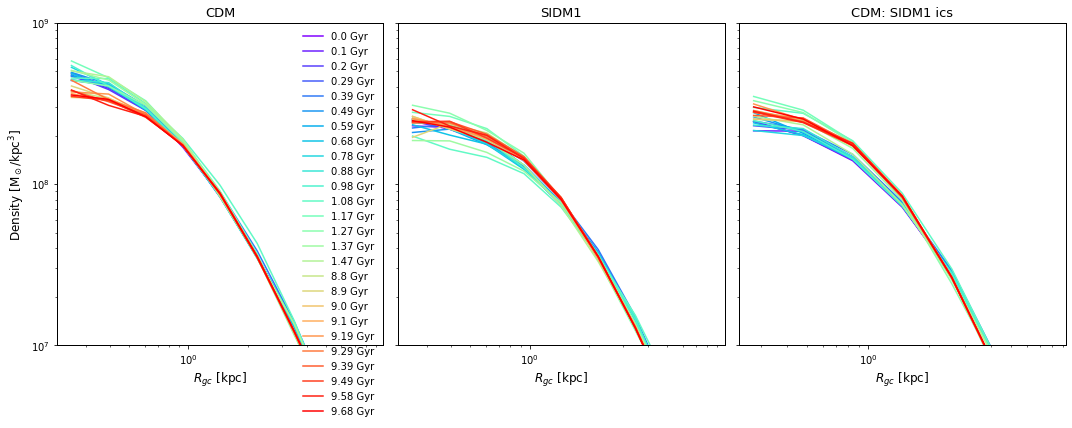

In [10]:
f, axs = plt.subplots(1, 3, sharey=True, sharex=False, figsize=(15, 6),)

ilist=range(len(cdm_host))

for i in ilist:

    colors = plt.cm.rainbow(np.linspace(0,1,max(ilist)+1))
    
    xlist_CDM, ylist_CDM = make_density_hist(cdm_host[i]['star'], 0.2, 10, 10)
    axs[0].plot(xlist_CDM, ylist_CDM, color=colors[i], label=str(round(time_samples[i],2)) + ' Gyr', linewidth=1.5)
    
    xlist_SIDM1, ylist_SIDM1 = make_density_hist(sidm1_host[i]['star'], 0.2, 10, 10)
    axs[1].plot(xlist_SIDM1, ylist_SIDM1, color=colors[i], label=str(round(time_samples[i],2)) + ' Gyr', linewidth=1.5)
    #axs[1].plot(xlist_CDM, ylist_CDM, color=colors[i], label=str(round(time_samples[i],2)) + ' Gyr', linewidth=0.5)
    
    #xlist_CDM_SC, ylist_CDM_SC = make_density_hist(cdm_sc_host[i]['star'], 0.2, 10, 8)
    #axs[2].plot(xlist_CDM_SC, ylist_CDM_SC, color=colors[i], label=str(round(time_samples[i],2)) + ' Gyr', linewidth=1.5)
    #axs[2].plot(xlist_CDM, ylist_CDM, color=colors[i], label=str(round(time_samples[i],2)) + ' Gyr', linewidth=0.5)
    
    xlist_CDM_SS, ylist_CDM_SS = make_density_hist(cdm_ss_host[i]['star'], 0.2, 10, 8)
    axs[2].plot(xlist_CDM_SS, ylist_CDM_SS, color=colors[i], label=str(round(time_samples[i],2)) + ' Gyr', linewidth=1.5)
    #axs[2].plot(xlist_CDM, ylist_CDM, color=colors[i], label=str(round(time_samples[i],2)) + ' Gyr', linewidth=0.5)


for i in range(3):
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].set_xlabel('$R_{gc}$ [kpc]', fontsize=12)
    
axs[0].set_ylim([1e7, 1e9])    
axs[0].set_ylabel('Density [M$_\odot$/kpc$^3$]', fontsize=12)
axs[0].set_title('CDM', fontsize=13)
axs[1].set_title('SIDM1', fontsize=13)
axs[2].set_title('CDM: SIDM1 ics', fontsize=13)
#axs[3].set_title('CDM: SIDM1 ic for host and sat', fontsize=13)
axs[0].legend(frameon=False, loc='upper right', fontsize=10)#,bbox_to_anchor=(5, 1))
plt.tight_layout()
plt.savefig('plots/hoststars_densityprofileevolution_aftermerger_sidm1.pdf')



In [11]:
def make_enclosed_mass(ls, maxradius):

    masslist=[]
    rlist = []
    
    for rmax in np.arange(0, maxradius, 0.1).tolist():
        mask = ls['position.sph'][:,0]<rmax
        selected = ls['mass'][mask]
        masslist.append(np.sum(selected))
        rlist.append(rmax)
    
    return rlist, masslist


NameError: name 'sidm10v_host' is not defined

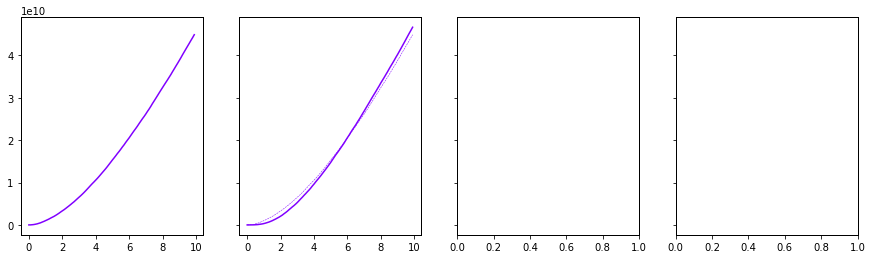

In [12]:
f, axs = plt.subplots(1, 4, sharey=True, sharex=False, figsize=(15, 4),)

for i in ilist:

    colors = plt.cm.rainbow(np.linspace(0,1,max(ilist)+1))
    
    xlist_CDM1, ylist_CDM1 = make_enclosed_mass(cdm_host[i]['dark'], 10)
    axs[0].plot(xlist_CDM1, ylist_CDM1, color=colors[i], label=str(round(time_array[i*10],2)) + ' Gyr', linewidth=1.5)
    
    xlist_SIDM1, ylist_SIDM1 = make_enclosed_mass(sidm1_host[i]['dark'], 10)
    axs[1].plot(xlist_CDM1, ylist_CDM1, color=colors[i], label=str(round(time_array[i*10],2)) + ' Gyr', linewidth=0.5, linestyle='dashed')
    axs[1].plot(xlist_SIDM1, ylist_SIDM1, color=colors[i], label=str(round(time_array[i*10],1)) + ' Gyr', linewidth=1.5)
    
    xlist_SIDM10v, ylist_SIDM10v = make_enclosed_mass(sidm10v_host[i]['dark'], 10)
    axs[2].plot(xlist_CDM1, ylist_CDM1, color=colors[i], label=str(round(time_array[i*10],2)) + ' Gyr', linewidth=0.5, linestyle='dashed')
    axs[2].plot(xlist_SIDM10v, ylist_SIDM10v, color=colors[i], label=str(round(time_array[i*10],2)) + ' Gyr', linewidth=1.5)
    
    xlist_SIDM1d, ylist_SIDM1d = make_enclosed_mass(sidm1d_host[i]['dark'], 10)
    axs[3].plot(xlist_CDM1, ylist_CDM1, color=colors[i], label=str(round(time_array[i*10],2)) + ' Gyr', linewidth=0.5, linestyle='dashed')
    axs[3].plot(xlist_SIDM1d, ylist_SIDM1d, color=colors[i], label=str(round(time_array[i*10],2)) + ' Gyr', linewidth=1.5)


for i in range(4):
    #axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].set_xlabel('$R_{gc}$ [kpc]', fontsize=12)
    axs[i].set_xlim([0.5, 10])  
    axs[i].set_ylim([1e9, 5e10])

axs[0].set_ylabel('Enclosed Mass [M$_\odot$]', fontsize=12)
axs[0].set_title('CDM', fontsize=13)
axs[1].set_title('SIDM1', fontsize=13)
axs[2].set_title('CDM: SIDM1 host ic and CDM sat ic', fontsize=13)
axs[3].set_title('CDM: SIDM1 ic for host and sat', fontsize=13)
axs[0].legend(frameon=False, loc='lower right', fontsize=10)#,bbox_to_anchor=(5, 1))
plt.tight_layout()
#plt.savefig('enclosedmassevolution_aftermerger.pdf')
#plt.savefig(plot_directory + '/density_vs_Rgc_host_halo.pdf')

/scratch/gpfs/mlisanti/anaconda/envs/sims/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/scratch/gpfs/mlisanti/anaconda/envs/sims/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/scratch/gpfs/mlisanti/anaconda/envs/sims/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/scratch/gpfs/mlisanti/anaconda/envs/sims/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/scratch/gpfs/mlisanti/anaconda/envs/sims/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/scratch/gpfs/mlisanti/anaconda/envs/sims/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: i

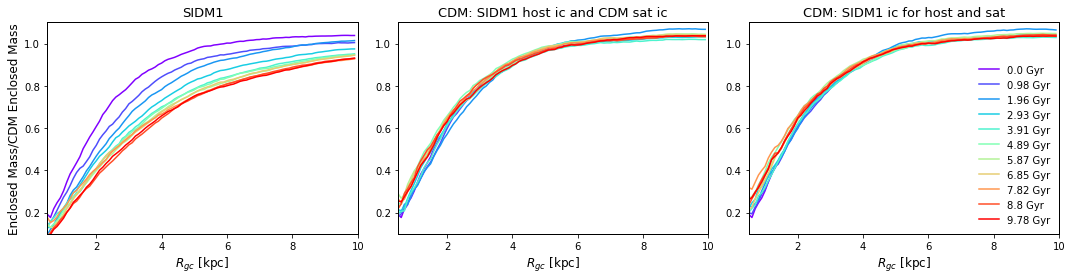

In [148]:
f, axs = plt.subplots(1, 3, sharey=False, sharex=False, figsize=(15, 4),)

for i in ilist:

    colors = plt.cm.rainbow(np.linspace(0,1,max(ilist)+1))
    
    #xlist_CDM1, ylist_CDM1 = make_enclosed_mass(cdm_host[i]['dark'], 10)
    #axs[0].plot(xlist_CDM1, ylist_CDM1, color=colors[i], label=str(round(time_array[i*10],2)) + ' Gyr', linewidth=1.5)
    
    xlist_SIDM1, ylist_SIDM1 = make_enclosed_mass(sidm1_host[i]['dark'], 10)
    axs[0].plot(xlist_SIDM1, np.divide(ylist_SIDM1, ylist_CDM1), color=colors[i], label=str(round(time_array[i*10],1)) + ' Gyr', linewidth=1.5)
    
    xlist_SIDM10v, ylist_SIDM10v = make_enclosed_mass(sidm10v_host[i]['dark'], 10)
    axs[1].plot(xlist_SIDM10v, np.divide(ylist_SIDM10v, ylist_CDM1), color=colors[i], label=str(round(time_array[i*10],2)) + ' Gyr', linewidth=1.5)
    
    xlist_SIDM1d, ylist_SIDM1d = make_enclosed_mass(sidm1d_host[i]['dark'], 10)
    axs[2].plot(xlist_SIDM1d, np.divide(ylist_SIDM1d, ylist_CDM1), color=colors[i], label=str(round(time_array[i*10],2)) + ' Gyr', linewidth=1.5)


for i in range(3):
    #axs[i].set_xscale('log')
    #axs[i].set_yscale('log')
    axs[i].set_xlabel('$R_{gc}$ [kpc]', fontsize=12)
    axs[i].set_xlim([0.5, 10])  
    axs[i].set_ylim([0.1, 1.1])

axs[0].set_ylabel('Enclosed Mass/CDM Enclosed Mass', fontsize=12)
axs[0].set_title('SIDM1', fontsize=13)
axs[1].set_title('CDM: SIDM1 host ic and CDM sat ic', fontsize=13)
axs[2].set_title('CDM: SIDM1 ic for host and sat', fontsize=13)
axs[2].legend(frameon=False, loc='lower right', fontsize=10)#,bbox_to_anchor=(5, 1))
plt.tight_layout()
plt.savefig('enclosedmassratio_aftermerger.pdf')
#plt.savefig(plot_directory + '/density_vs_Rgc_host_halo.pdf')

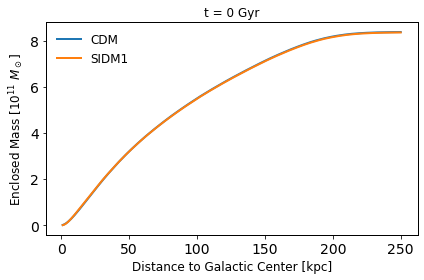

In [24]:
rmax_list = np.linspace(1, 250, 200)
massCDM_list = []
massSIDM1_list = []

for i in range(len(rmax_list)):

    mask_CDM = cdm_host[0]['dark']['position.sph'][:,0]<rmax_list[i]
    massCDM_list.append(np.sum(cdm_host[0]['dark']['mass'][mask_CDM])*10**-11)
    
    mask_SIDM1 = sidm1_host[0]['dark']['position.sph'][:,0]<rmax_list[i]
    massSIDM1_list.append(np.sum(sidm1_host[0]['dark']['mass'][mask_SIDM1])*10**-11)
    
plt.plot(rmax_list, massCDM_list, label='CDM')
plt.plot(rmax_list, massSIDM1_list, label='SIDM1')
plt.xlabel('Distance to Galactic Center [kpc]', fontsize=12)
plt.ylabel(r'Enclosed Mass [$10^{11}~M_\odot$]', fontsize=12)
plt.title('t = 0 Gyr', fontsize=12)
plt.legend(frameon=False, fontsize=12)
plt.tight_layout()
plt.show()

# Velocity of Host Stellar Disk

In [14]:
def vphi_trends(ls, i):

    lp_list = []
    v_list = []
    vR_list = []
    vphi_list =[]
    vz_list = []
    std_list=[]
    stdR_list = []
    stdphi_list = []
    stdz_list = []
    r_array = np.linspace(0, 15, 15)
        
    for j in range(len(r_array)-1):
    
        ls_mask = (ls[i]['star']['position.cyl'][:,0] < r_array[+1:][j]) & (ls[i]['star']['position.cyl'][:,0] > r_array[:-1][j])

        mean_tot = np.mean(np.sqrt(ls[i]['star']['velocity.cyl'][:,0][ls_mask]**2 + ls[i]['star']['velocity.cyl'][:,1][ls_mask]**2+ls[i]['star']['velocity.cyl'][:,2][ls_mask]**2))
        
        mean_vR = np.mean(ls[i]['star']['velocity.cyl'][:,0][ls_mask])
        mean_vphi = np.mean(ls[i]['star']['velocity.cyl'][:,1][ls_mask])
        mean_vz = np.mean(ls[i]['star']['velocity.cyl'][:,2][ls_mask])
        
        v_list.append(mean_tot)
        vR_list.append(mean_vR)
        vphi_list.append(mean_vphi)
        vz_list.append(mean_vz)
        
        sig_tot = np.std(np.sqrt(ls[i]['star']['velocity.cyl'][:,0][ls_mask]**2 + ls[i]['star']['velocity.cyl'][:,1][ls_mask]**2+ls[i]['star']['velocity.cyl'][:,2][ls_mask]**2))
        
        sig_R = np.std(ls[i]['star']['velocity.cyl'][:,0][ls_mask])
        sig_phi = np.std(ls[i]['star']['velocity.cyl'][:,1][ls_mask])
        sig_z = np.std(ls[i]['star']['velocity.cyl'][:,2][ls_mask])
        
        stdR_list.append(sig_R)
        stdphi_list.append(sig_phi)
        stdz_list.append(sig_z)
        std_list.append(sig_tot)
    
        rmid_array = (r_array[+1:]+r_array[:-1])/2
        
    return np.array(rmid_array), np.array(v_list), np.array(vR_list), np.array(vphi_list), np.array(vz_list), \
            np.array(std_list), np.array(stdR_list), np.array(stdphi_list), np.array(stdz_list)

In [15]:
def make_velocity_panel(ls, filename):
    
    f, axs = plt.subplots(2, 4, sharey=False, sharex=True, figsize=(20, 8),)

    j=0
    ilist = range(len(ls))

    for i in ilist:
    
        colors = plt.cm.rainbow(np.linspace(0,1,len(ilist)))    
        r, v, vR, vphi, vz, s, sR, sphi, sz = vphi_trends(ls, i)
        rc, vc, vRc, vphic, vzc, sc, sRc, sphic, szc = vphi_trends(cdm_host, i)
        
        axs[0][0].plot(r, v, color=colors[j], label=str(round(time_samples[i],2)) + ' Gyr')
        #axs[0][0].plot(rc, vc, color=colors[j], linewidth = 1,linestyle='--')
        axs[0][1].plot(r, vR, color=colors[j], label=str(round(time_samples[i],2)) + ' Gyr')
        #axs[0][1].plot(rc, vRc, color=colors[j], linewidth = 1,linestyle='--')
        axs[0][2].plot(r, vphi, color=colors[j], label=str(round(time_samples[i],2)) + ' Gyr')
        #axs[0][2].plot(rc, vphic, color=colors[j], linewidth = 1,linestyle='--')
        axs[0][3].plot(r, vz, color=colors[j], label=str(round(time_samples[i],2)) + ' Gyr')
        #axs[0][3].plot(rc, vzc, color=colors[j], linewidth = 1,linestyle='--')
        
        axs[1][0].plot(r, s,  color=colors[j], label=str(round(time_samples[i],2)) + ' Gyr')
        #axs[1][0].plot(rc, sc, color=colors[j], linewidth = 1,linestyle='--')
        axs[1][1].plot(r, sR, color=colors[j], label=str(round(time_samples[i],2)) + ' Gyr')
        #axs[1][1].plot(rc, sRc, color=colors[j], linewidth = 1,linestyle='--')
        axs[1][2].plot(r, sphi, color=colors[j], label=str(round(time_samples[i],2)) + ' Gyr')
        #axs[1][2].plot(rc, sphic, color=colors[j], linewidth = 1,linestyle='--')
        axs[1][3].plot(r, sz, color=colors[j], label=str(round(time_samples[i],2)) + ' Gyr')
        #axs[1][3].plot(rc, szc, color=colors[j], linewidth = 1,linestyle='--')
    
        j+=1
    
    axs[0][0].set_ylabel(r'$\langle v \rangle$ [km/s]', fontsize=14)
    axs[0][1].set_ylabel(r'$\langle v_R \rangle$ [km/s]', fontsize=14)
    axs[0][2].set_ylabel(r'$\langle v_\phi \rangle$ [km/s]', fontsize=14)
    axs[0][3].set_ylabel(r'$\langle v_z \rangle$ [km/s]', fontsize=14)
        
    axs[1][0].set_ylabel(r'$\sigma$ [km/s]', fontsize=14)
    axs[1][1].set_ylabel(r'$\sigma_R$ [km/s]', fontsize=14)
    axs[1][2].set_ylabel(r'$\sigma_\phi$ [km/s]', fontsize=14)
    axs[1][3].set_ylabel(r'$\sigma_z$ [km/s]', fontsize=14)
        
    for k in range(4):
        axs[0][k].set_ylim([-15, 180])
        axs[1][k].set_ylim([0, 100])
        axs[1][k].set_xlabel(r'$R$ [kpc]', fontsize=14)
    
    plt.legend(frameon=False, fontsize=10, bbox_to_anchor=(1, 1))
    plt.savefig('plots/'+ filename)
    plt.tight_layout()

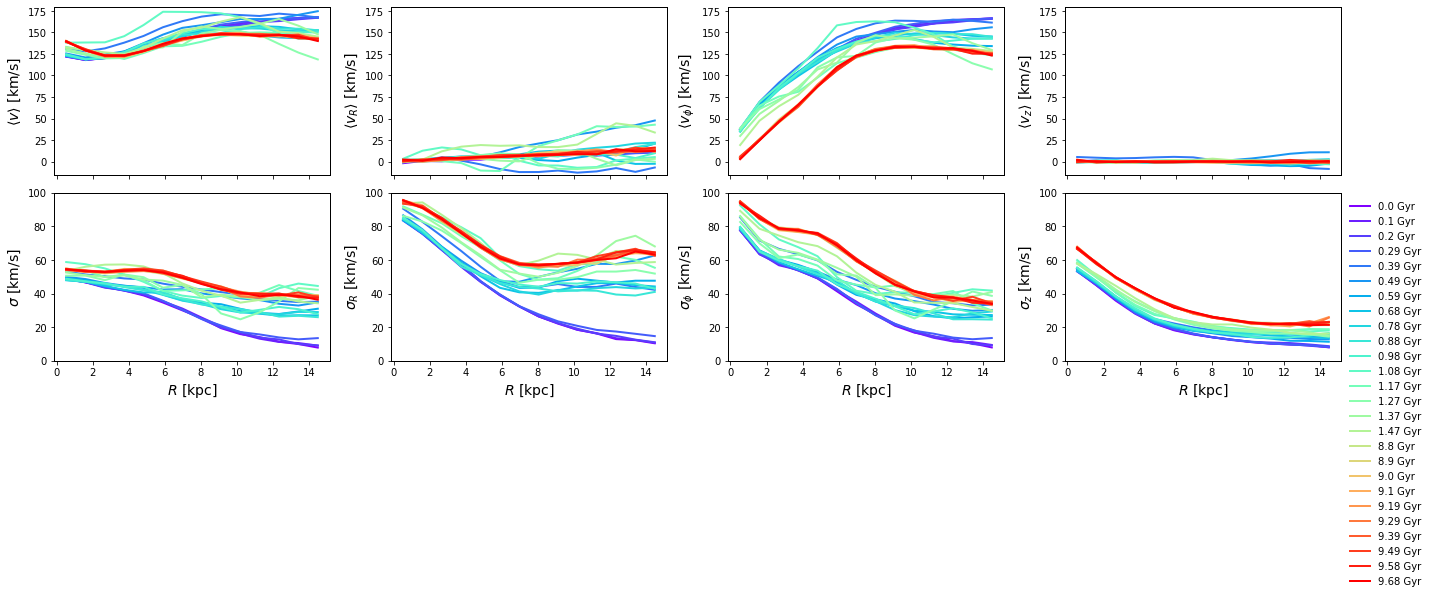

In [16]:
make_velocity_panel(cdm_host, 'cdm_host_stars_velpanel.pdf')

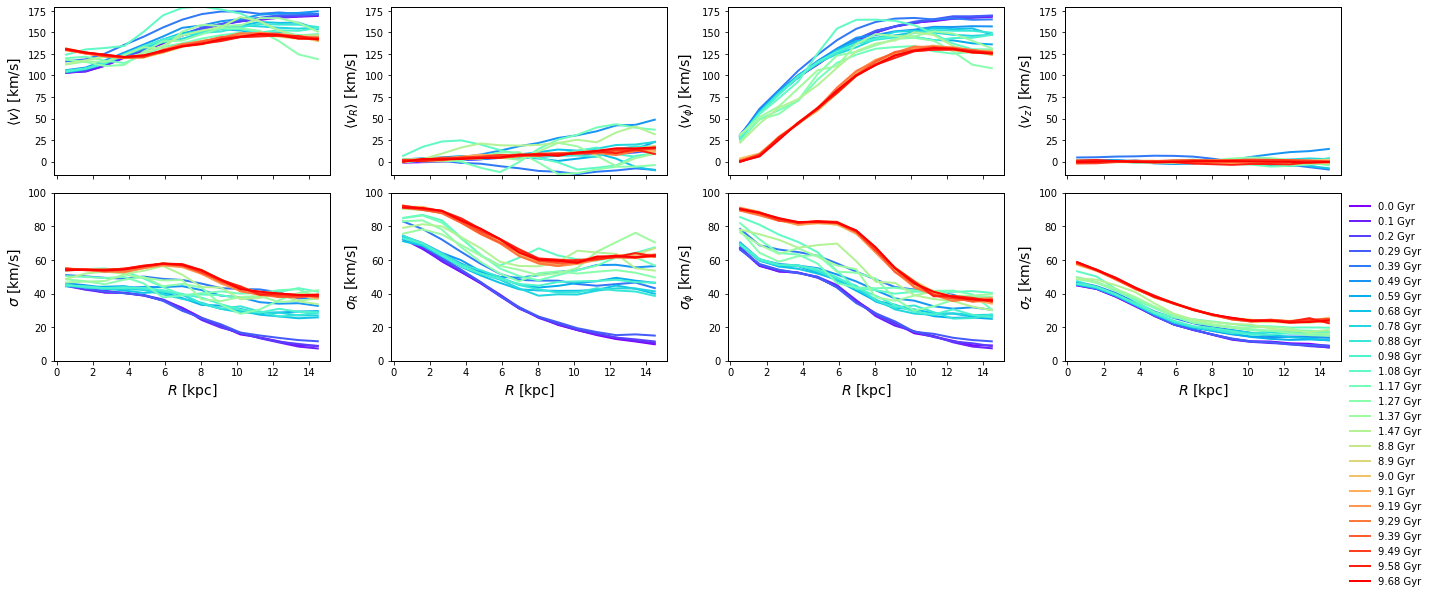

In [17]:
make_velocity_panel(cdm_ss_host, 'cdm_ss_host_stars_velpanel_sidm1.pdf')

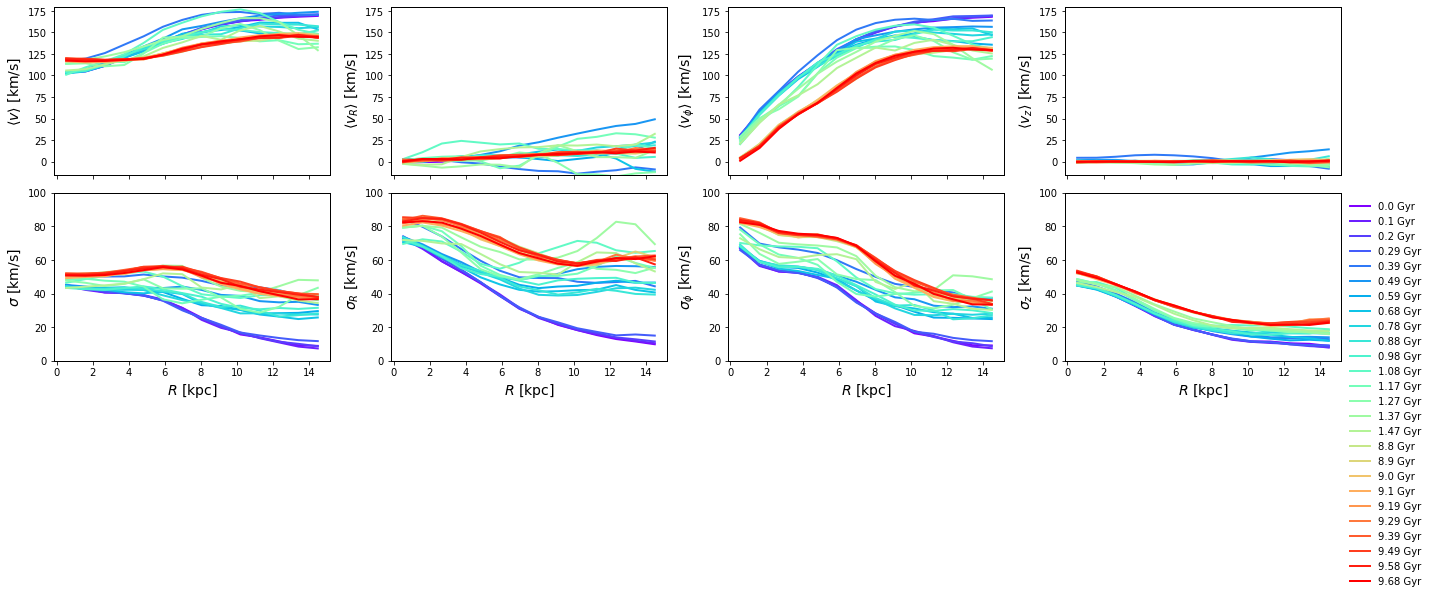

In [18]:
make_velocity_panel(sidm1_host, 'sidm1_host_stars_velpanel.pdf')

ValueError: too many values to unpack (expected 5)

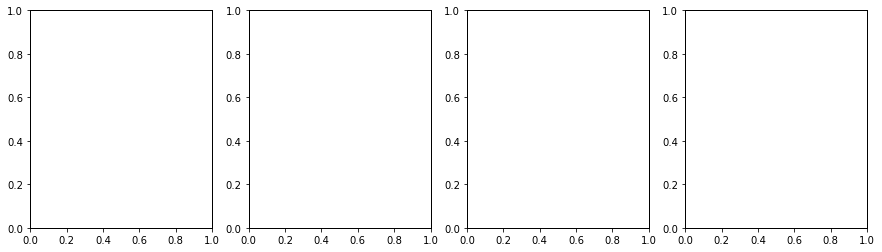

In [17]:
f, axs = plt.subplots(1, 4, sharey=False, sharex=True, figsize=(15, 4),)

j=0

for i in ilist:
    
    colors = plt.cm.rainbow(np.linspace(0,1,len(ilist)))    
    
    
    rarray_cdm_ss, mpphiarray_cdm_ss, mparray_cdm_ss, stdphiarray_cdm_ss, stdarray_cdm_ss = vphi_trends(cdm_ss_host, i)
    #rarray_cdm_sc, mpphiarray_cdm_sc, mparray_cdm_sc, stdphiarray_cdm_sc, stdarray_cdm_sc = vphi_trends(cdm_sc_host, i)
    rarray_sidm1, mpphiarray_sidm1, mparray_sidm1, stdphiarray_sidm1, stdarray_sidm1 = vphi_trends(sidm1_host, i)
    #rarray_cdm, mpphiarray_cdm, mparray_cdm, stdphiarray_cdm, stdarray_cdm = vphi_trends(cdm_host, i)
  
    axs[0].plot([0, 15], [1, 1], color='k', linewidth=0.5)
    axs[0].plot(rarray_cdm_ss, np.divide(mparray_sidm1, mparray_cdm_ss),  color=colors[j], label=str(round(time_samples[i],2)) + ' Gyr')

    axs[1].plot([0, 15], [1, 1], color='k', linewidth=0.5)
    axs[1].plot(rarray_cdm_ss, np.divide(stdarray_sidm1, stdarray_cdm_ss), color=colors[j], label=str(round(time_samples[i],2)) + ' Gyr')
    
    axs[2].plot([0, 15], [1, 1], color='k', linewidth=0.5)
    axs[2].plot(rarray_cdm_ss, np.divide(mpphiarray_sidm1, mpphiarray_cdm_ss),  color=colors[j], label=str(round(time_samples[i],2)) + ' Gyr')
    
    axs[3].plot([0, 15], [1, 1], color='k', linewidth=0.5)
    axs[3].plot(rarray_cdm_ss, np.divide(stdphiarray_sidm1, stdphiarray_cdm_ss), color=colors[j], label=str(round(time_samples[i],2)) + ' Gyr')

    
    j+=1

axs[0].set_ylim([0.6, 1.4])
axs[1].set_ylim([0.6, 1.4])
axs[2].set_ylim([0.6, 1.4])
axs[3].set_ylim([0.6, 1.4])

axs[0].set_ylabel(r'$\bar{v}$(SIDM1)/$\bar{v}$(CDM_ss)', fontsize=12)
axs[2].set_ylabel(r'$\bar{v}_{\phi}$(SIDM1)/$\bar{v}_{\phi}$(CDM_ss)', fontsize=12)
axs[3].set_ylabel(r'$\sigma_{v_{\phi}}$(SIDM1)/$\sigma_{v_{\phi}}$(CDM_ss)', fontsize=12)
axs[1].set_ylabel(r'$\sigma_{tot}$(SIDM1)/$\sigma_{tot}$(CDM_ss)', fontsize=12)

axs[0].set_xlabel(r'$R$ [kpc]', fontsize=12)
axs[1].set_xlabel(r'$R$ [kpc]', fontsize=12)
axs[2].set_xlabel(r'$R$ [kpc]', fontsize=12)
plt.legend(frameon=False, fontsize=10,bbox_to_anchor=(1, 1))
#plt.savefig('ratios_host_stars.pdf')
plt.tight_layout()

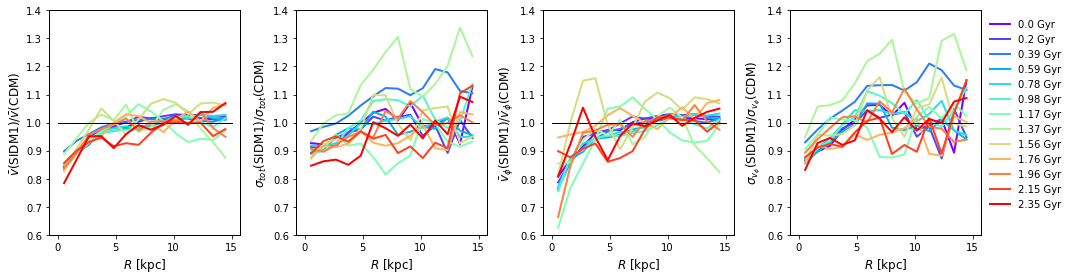

In [21]:
f, axs = plt.subplots(1, 4, sharey=False, sharex=True, figsize=(15, 4),)

j=0

for i in ilist:
    
    colors = plt.cm.rainbow(np.linspace(0,1,len(ilist)))    
    
    
    rarray_cdm_ss, mpphiarray_cdm_ss, mparray_cdm_ss, stdphiarray_cdm_ss, stdarray_cdm_ss = vphi_trends(cdm_ss_host, i)
    rarray_cdm_sc, mpphiarray_cdm_sc, mparray_cdm_sc, stdphiarray_cdm_sc, stdarray_cdm_sc = vphi_trends(cdm_sc_host, i)
    rarray_sidm1, mpphiarray_sidm1, mparray_sidm1, stdphiarray_sidm1, stdarray_sidm1 = vphi_trends(sidm1_host, i)
    rarray_cdm, mpphiarray_cdm, mparray_cdm, stdphiarray_cdm, stdarray_cdm = vphi_trends(cdm_host, i)
  
    axs[0].plot([0, 15], [1, 1], color='k', linewidth=0.5)
    axs[0].plot(rarray_cdm, np.divide(mparray_sidm1, mparray_cdm),  color=colors[j], label=str(round(time_samples[i],2)) + ' Gyr')
    
    axs[1].plot([0, 15], [1, 1], color='k', linewidth=0.5)
    axs[1].plot(rarray_cdm, np.divide(stdarray_sidm1, stdarray_cdm), color=colors[j], label=str(round(time_samples[i],2)) + ' Gyr')
    
    axs[2].plot([0, 15], [1, 1], color='k', linewidth=0.5)
    axs[2].plot(rarray_cdm, np.divide(mpphiarray_sidm1, mpphiarray_cdm),  color=colors[j], label=str(round(time_samples[i],2)) + ' Gyr')

    axs[3].plot([0, 15], [1, 1], color='k', linewidth=0.5)
    axs[3].plot(rarray_cdm, np.divide(stdphiarray_sidm1, stdphiarray_cdm), color=colors[j], label=str(round(time_samples[i],2)) + ' Gyr')
    
    
    j+=1

axs[0].set_ylim([0.6, 1.4])
axs[1].set_ylim([0.6, 1.4])
axs[2].set_ylim([0.6, 1.4])
axs[3].set_ylim([0.6, 1.4])

axs[0].set_ylabel(r'$\bar{v}$(SIDM1)/$\bar{v}$(CDM)', fontsize=12)
axs[2].set_ylabel(r'$\bar{v}_{\phi}$(SIDM1)/$\bar{v}_{\phi}$(CDM)', fontsize=12)
axs[3].set_ylabel(r'$\sigma_{v_{\phi}}$(SIDM1)/$\sigma_{v_{\phi}}$(CDM)', fontsize=12)
axs[1].set_ylabel(r'$\sigma_{tot}$(SIDM1)/$\sigma_{tot}$(CDM)', fontsize=12)

axs[0].set_xlabel(r'$R$ [kpc]', fontsize=12)
axs[1].set_xlabel(r'$R$ [kpc]', fontsize=12)
axs[2].set_xlabel(r'$R$ [kpc]', fontsize=12)
axs[3].set_xlabel(r'$R$ [kpc]', fontsize=12)
plt.legend(frameon=False, fontsize=10,bbox_to_anchor=(1, 1))
#plt.savefig('ratios_host_stars.pdf')
plt.tight_layout()

# Energy Analysis

In [11]:
def speed(ls, i, part, lsmask):
    
    return np.sqrt(ls[i][part]['velocity'][:,0][lsmask]**2 + ls[i][part]['velocity'][:,1][lsmask]**2 + ls[i][part]['velocity'][:,2][lsmask]**2)
        
        
def kinetic_energy(ls, i, part, lsmask):
    return speed(ls, i, part, lsmask)**2/2

def potential_energy(ls, i, part, lsmask):
    
    return ls[i][part]['potential'][lsmask]

def tot_energy(ls, i, part,  lsmask):
    return kinetic_energy(ls, i, part, lsmask) + potential_energy(ls, i, part, lsmask)


0.0
0.5868000000000001


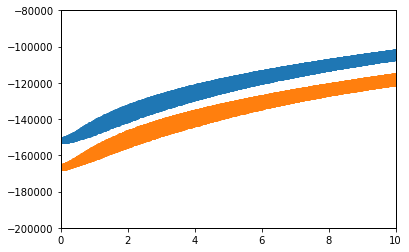

In [34]:
i = 0
ls=cdm_host
lsmask = (ls[i][part]['position.sph'][:,0] < 100) & (ls[i][part]['position.sph'][:,0] >0)
plt.scatter(ls[i]['dark']['position.sph'][:,0][lsmask], potential_energy(ls, i, 'dark', lsmask))
plt.xlim([0, 10])
print(time_samples[i])

i = 6
ls=cdm_host
lsmask = (ls[i][part]['position.sph'][:,0] < 100) & (ls[i][part]['position.sph'][:,0] >0)
plt.scatter(ls[i]['dark']['position.sph'][:,0][lsmask], potential_energy(ls, i, 'dark', lsmask))
plt.xlim([0, 10])
plt.ylim([-2e5, -8e4])
print(time_samples[i])


In [36]:
def make_lists(ls, part, rlimits):

    dVdt_list = []
    dEdt_list = []
    R_list = []
    
    for i in range(len(ls)-1):

        lsmask = (ls[i][part]['position.sph'][:,0] < rlimits[1]) & (ls[i][part]['position.sph'][:,0] >rlimits[0])

        E1 = tot_energy(ls, i, part, lsmask)
        E2 = tot_energy(ls, i+1, part, lsmask)

        V1 = potential_energy(ls, i, part, lsmask)
        V2 = potential_energy(ls, i+1, part, lsmask)

        t1 = time_samples[i]
        t2 = time_samples[i+1]
    
        R_list.append(ls[i][part]['position.sph'][:,0][lsmask])

        dVdt_list.append(np.divide(V2-V1, t2-t1))
        dEdt_list.append(np.divide(E2-E1, t2-t1))

    return R_list, dVdt_list, dEdt_list

In [66]:
ls=sidm1_host
part='dark'
rlist1, vlist1, elist1 = make_lists(ls, part, [0, 100])
rlist2, vlist2, elist2 = make_lists(ls, part, [2, 3])
#rlist3, vlist3, elist3 = make_lists(ls, part, [7, 10])

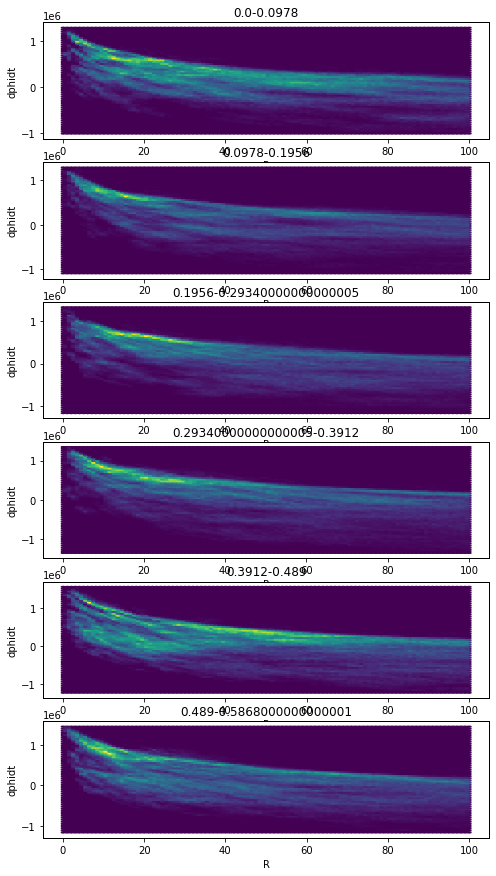

In [67]:
f, axs = plt.subplots(6, 1, sharey=False, sharex=False, figsize=(8, 15),)

axs[0].hexbin(rlist1[0], vlist1[0])
axs[0].set_xlabel('R')
axs[0].set_ylabel('dphidt')
axs[0].set_title(str(time_samples[0]) + '-' + str(time_samples[1]))

axs[1].hexbin(rlist1[1], vlist1[1])
axs[1].set_xlabel('R')
axs[1].set_ylabel('dphidt')
axs[1].set_title(str(time_samples[1]) + '-' + str(time_samples[2]))

axs[2].hexbin(rlist1[2], vlist1[2])
axs[2].set_xlabel('R')
axs[2].set_ylabel('dphidt')
axs[2].set_title(str(time_samples[2]) + '-' + str(time_samples[3]))

axs[3].hexbin(rlist1[3], vlist1[3])
axs[3].set_xlabel('R')
axs[3].set_ylabel('dphidt')
axs[3].set_title(str(time_samples[3]) + '-' + str(time_samples[4]))

axs[4].hexbin(rlist1[4], vlist1[4])
axs[4].set_xlabel('R')
axs[4].set_ylabel('dphidt')
axs[4].set_title(str(time_samples[4]) + '-' + str(time_samples[5]))

axs[5].hexbin(rlist1[5], vlist1[5])
axs[5].set_xlabel('R')
axs[5].set_ylabel('dphidt')
axs[5].set_title(str(time_samples[5]) + '-' + str(time_samples[6]))

f.savefig('plots/sidm.pdf')

In [53]:
ls=cdm_host
part='dark'
rlist1, vlist1, elist1 = make_lists(ls, part, [5, 10])
rlist2, vlist2, elist2 = make_lists(ls, part, [10, 15])
#rlist3, vlist3, elist3 = make_lists(ls, part, [7, 10])

In [54]:
time_samples

array([0.    , 0.0978, 0.1956, 0.2934, 0.3912, 0.489 , 0.5868, 0.6846,
       0.7824, 0.8802, 0.978 , 1.0758, 1.1736, 1.2714, 1.3692, 1.467 ,
       8.802 , 8.8998, 8.9976, 9.0954, 9.1932, 9.291 , 9.3888, 9.4866,
       9.5844, 9.6822])

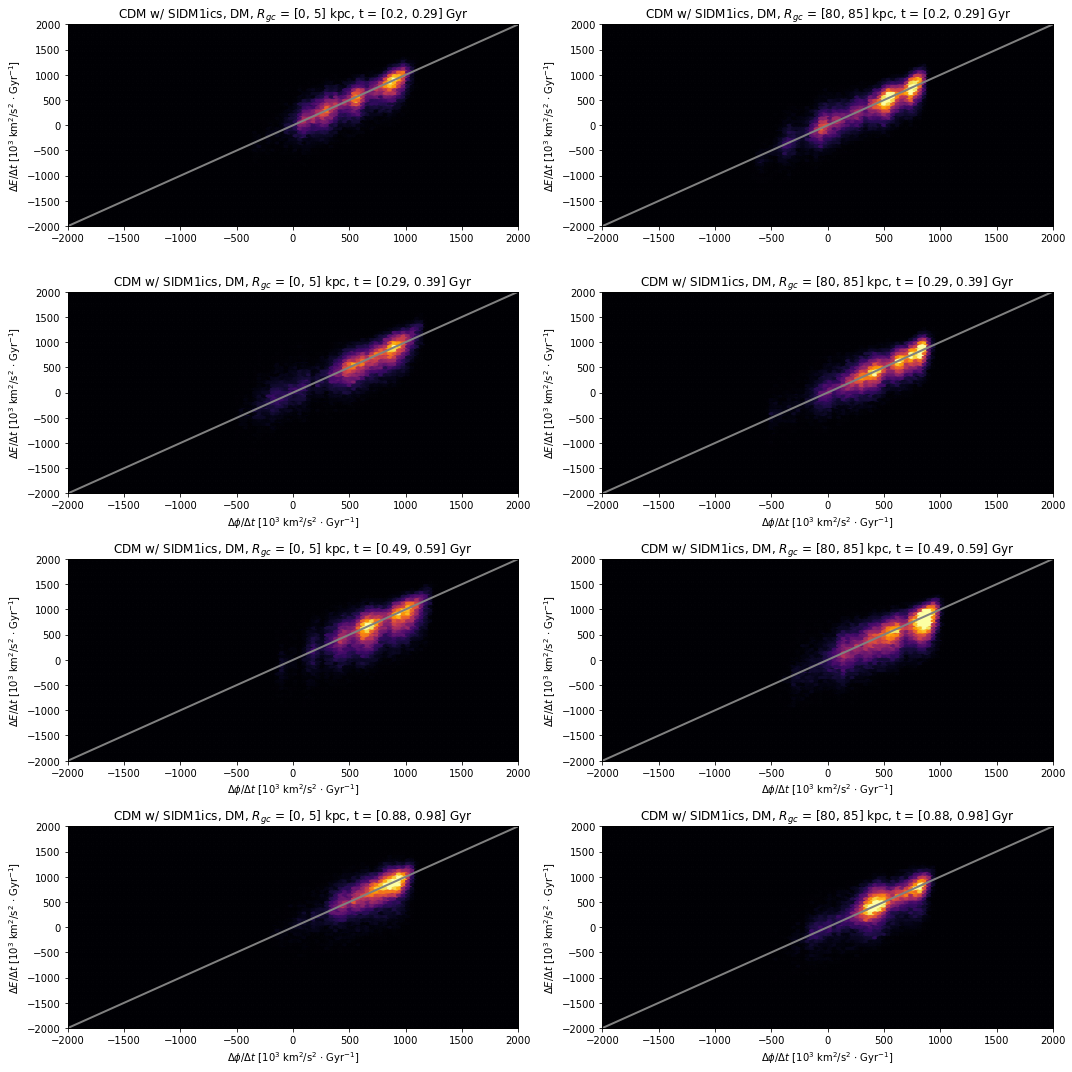

In [60]:
f, axs = plt.subplots(4, 2, sharey=False, sharex=False, figsize=(15, 15),)

vmax=200

i=2 
axs[0][0].hexbin(vlist1[i]*1e-3, elist1[i]*1e-3, cmap='inferno', vmax = vmax, extent=[-2000, 2000, -2000, 2000])
axs[0][0].plot([-2000, 2000], [-2000, 2000], color='gray')
axs[0][0].set_xlim([-2000, 2000])
axs[0][0].set_ylim([-2000, 2000])

axs[0][0].set_ylabel(r'$\Delta E/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[0][0].set_title(r'CDM w/ SIDM1ics, DM, $R_{gc}$ = [0, 5] kpc, t = [' + str(round(time_samples[i],2)) + ', ' +str(round(time_samples[i+1],2)) + '] Gyr')

axs[0][1].hexbin(vlist2[i]*1e-3, elist2[i]*1e-3, cmap='inferno', vmax = vmax, extent=[-2000, 2000, -2000, 2000])
axs[0][1].plot([-2000, 2000], [-2000, 2000], color='gray')
axs[0][1].set_xlim([-2000, 2000])
axs[0][1].set_ylim([-2000, 2000])

axs[0][1].set_ylabel(r'$\Delta E/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[0][1].set_title(r'CDM w/ SIDM1ics, DM, $R_{gc}$ = [80, 85] kpc, t = [' + str(round(time_samples[i],2)) + ', ' +str(round(time_samples[i+1],2)) + '] Gyr')


i=3 
axs[1][0].hexbin(vlist1[i]*1e-3, elist1[i]*1e-3, vmax = vmax, cmap='inferno', extent=[-2000, 2000, -2000, 2000])
axs[1][0].plot([-2000, 2000], [-2000, 2000], color='gray')
axs[1][0].set_xlim([-2000, 2000])
axs[1][0].set_ylim([-2000, 2000])

axs[1][0].set_xlabel(r'$\Delta \phi/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[1][0].set_ylabel(r'$\Delta E/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[1][0].set_title(r'CDM w/ SIDM1ics, DM, $R_{gc}$ = [0, 5] kpc, t = [' + str(round(time_samples[i],2)) + ', ' +str(round(time_samples[i+1],2)) + '] Gyr')

axs[1][1].hexbin(vlist2[i]*1e-3, elist2[i]*1e-3, vmax = vmax, cmap='inferno', extent=[-2000, 2000, -2000, 2000])
axs[1][1].plot([-2000, 2000], [-2000, 2000], color='gray')
axs[1][1].set_xlim([-2000, 2000])
axs[1][1].set_ylim([-2000, 2000])

axs[1][1].set_xlabel(r'$\Delta \phi/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[1][1].set_ylabel(r'$\Delta E/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[1][1].set_title(r'CDM w/ SIDM1ics, DM, $R_{gc}$ = [80, 85] kpc, t = [' + str(round(time_samples[i],2)) + ', ' +str(round(time_samples[i+1],2)) + '] Gyr')


i=5 
axs[2][0].hexbin(vlist1[i]*1e-3, elist1[i]*1e-3, vmax = vmax, cmap='inferno', extent=[-2000, 2000, -2000, 2000])
axs[2][0].plot([-2000, 2000], [-2000, 2000], color='gray')
axs[2][0].set_xlim([-2000, 2000])
axs[2][0].set_ylim([-2000, 2000])

axs[2][0].set_xlabel(r'$\Delta \phi/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[2][0].set_ylabel(r'$\Delta E/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[2][0].set_title(r'CDM w/ SIDM1ics, DM, $R_{gc}$ = [0, 5] kpc, t = [' + str(round(time_samples[i],2)) + ', ' +str(round(time_samples[i+1],2)) + '] Gyr')

axs[2][1].hexbin(vlist2[i]*1e-3, elist2[i]*1e-3, vmax = vmax, cmap='inferno', extent=[-2000, 2000, -2000, 2000])
axs[2][1].plot([-2000, 2000], [-2000, 2000], color='gray')
axs[2][1].set_xlim([-2000, 2000])
axs[2][1].set_ylim([-2000, 2000])

axs[2][1].set_xlabel(r'$\Delta \phi/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[2][1].set_ylabel(r'$\Delta E/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[2][1].set_title(r'CDM w/ SIDM1ics, DM, $R_{gc}$ = [80, 85] kpc, t = [' + str(round(time_samples[i],2)) + ', ' +str(round(time_samples[i+1],2)) + '] Gyr')


i=9 
axs[3][0].hexbin(vlist1[i]*1e-3, elist1[i]*1e-3, vmax = vmax,cmap='inferno',  extent=[-2000, 2000, -2000, 2000])
axs[3][0].plot([-2000, 2000], [-2000, 2000], color='gray')
axs[3][0].set_xlim([-2000, 2000])
axs[3][0].set_ylim([-2000, 2000])

axs[3][0].set_xlabel(r'$\Delta \phi/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[3][0].set_ylabel(r'$\Delta E/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[3][0].set_title(r'CDM w/ SIDM1ics, DM, $R_{gc}$ = [0, 5] kpc, t = [' + str(round(time_samples[i],2)) + ', ' +str(round(time_samples[i+1],2)) + '] Gyr')

axs[3][1].hexbin(vlist2[i]*1e-3, elist2[i]*1e-3, vmax = vmax, cmap='inferno', extent=[-2000, 2000, -2000, 2000])
axs[3][1].plot([-2000, 2000], [-2000, 2000], color='gray')
axs[3][1].set_xlim([-2000, 2000])
axs[3][1].set_ylim([-2000, 2000])

axs[3][1].set_xlabel(r'$\Delta \phi/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[3][1].set_ylabel(r'$\Delta E/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[3][1].set_title(r'CDM w/ SIDM1ics, DM, $R_{gc}$ = [80, 85] kpc, t = [' + str(round(time_samples[i],2)) + ', ' +str(round(time_samples[i+1],2)) + '] Gyr')



plt.tight_layout()
#plt.savefig('plots/violent_relaxation_panel_CDM_with_SIDM1ics_DM.pdf')
plt.show()

In [ ]:
f, axs = plt.subplots(4, 2, sharey=False, sharex=False, figsize=(15, 15),)

vmax=50

i=0 
axs[0][0].hexbin(vlist1[i]*1e-3, cmap='inferno', vmax = vmax, extent=[-2000, 2000, -2000, 2000])
axs[0][0].plot([-2000, 2000], [-2000, 2000], color='gray')
axs[0][0].set_xlim([-2000, 2000])
axs[0][0].set_ylim([-2000, 2000])

#axs[0][0].set_ylabel(r'$\Delta E/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
#axs[0][0].set_title(r'CDM w/ SIDM1ics, DM, $R_{gc}$ = [0, 5] kpc, t = [' + str(round(time_samples[i],2)) + ', ' +str(round(time_samples[i+1],2)) + '] Gyr')

axs[0][1].hexbin(vlist2[i]*1e-3, elist2[i]*1e-3, cmap='inferno', vmax = vmax, extent=[-2000, 2000, -2000, 2000])
axs[0][1].plot([-2000, 2000], [-2000, 2000], color='gray')
axs[0][1].set_xlim([-2000, 2000])
axs[0][1].set_ylim([-2000, 2000])

axs[0][1].set_ylabel(r'$\Delta E/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[0][1].set_title(r'CDM w/ SIDM1ics, DM, $R_{gc}$ = [80, 85] kpc, t = [' + str(round(time_samples[i],2)) + ', ' +str(round(time_samples[i+1],2)) + '] Gyr')


i=5 
axs[1][0].hexbin(vlist1[i]*1e-3, elist1[i]*1e-3, vmax = vmax, cmap='inferno', extent=[-2000, 2000, -2000, 2000])
axs[1][0].plot([-2000, 2000], [-2000, 2000], color='gray')
axs[1][0].set_xlim([-2000, 2000])
axs[1][0].set_ylim([-2000, 2000])

axs[1][0].set_xlabel(r'$\Delta \phi/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[1][0].set_ylabel(r'$\Delta E/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[1][0].set_title(r'CDM w/ SIDM1ics, DM, $R_{gc}$ = [0, 5] kpc, t = [' + str(round(time_samples[i],2)) + ', ' +str(round(time_samples[i+1],2)) + '] Gyr')

axs[1][1].hexbin(vlist2[i]*1e-3, elist2[i]*1e-3, vmax = vmax, cmap='inferno', extent=[-2000, 2000, -2000, 2000])
axs[1][1].plot([-2000, 2000], [-2000, 2000], color='gray')
axs[1][1].set_xlim([-2000, 2000])
axs[1][1].set_ylim([-2000, 2000])

axs[1][1].set_xlabel(r'$\Delta \phi/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[1][1].set_ylabel(r'$\Delta E/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[1][1].set_title(r'CDM w/ SIDM1ics, DM, $R_{gc}$ = [80, 85] kpc, t = [' + str(round(time_samples[i],2)) + ', ' +str(round(time_samples[i+1],2)) + '] Gyr')


i=13 
axs[2][0].hexbin(vlist1[i]*1e-3, elist1[i]*1e-3, vmax = vmax, cmap='inferno', extent=[-2000, 2000, -2000, 2000])
axs[2][0].plot([-2000, 2000], [-2000, 2000], color='gray')
axs[2][0].set_xlim([-2000, 2000])
axs[2][0].set_ylim([-2000, 2000])

axs[2][0].set_xlabel(r'$\Delta \phi/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[2][0].set_ylabel(r'$\Delta E/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[2][0].set_title(r'CDM w/ SIDM1ics, DM, $R_{gc}$ = [0, 5] kpc, t = [' + str(round(time_samples[i],2)) + ', ' +str(round(time_samples[i+1],2)) + '] Gyr')

axs[2][1].hexbin(vlist2[i]*1e-3, elist2[i]*1e-3, vmax = vmax, cmap='inferno', extent=[-2000, 2000, -2000, 2000])
axs[2][1].plot([-2000, 2000], [-2000, 2000], color='gray')
axs[2][1].set_xlim([-2000, 2000])
axs[2][1].set_ylim([-2000, 2000])

axs[2][1].set_xlabel(r'$\Delta \phi/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[2][1].set_ylabel(r'$\Delta E/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[2][1].set_title(r'CDM w/ SIDM1ics, DM, $R_{gc}$ = [80, 85] kpc, t = [' + str(round(time_samples[i],2)) + ', ' +str(round(time_samples[i+1],2)) + '] Gyr')


i=20 
axs[3][0].hexbin(vlist1[i]*1e-3, elist1[i]*1e-3, vmax = vmax,cmap='inferno',  extent=[-2000, 2000, -2000, 2000])
axs[3][0].plot([-2000, 2000], [-2000, 2000], color='gray')
axs[3][0].set_xlim([-2000, 2000])
axs[3][0].set_ylim([-2000, 2000])

axs[3][0].set_xlabel(r'$\Delta \phi/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[3][0].set_ylabel(r'$\Delta E/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[3][0].set_title(r'CDM w/ SIDM1ics, DM, $R_{gc}$ = [0, 5] kpc, t = [' + str(round(time_samples[i],2)) + ', ' +str(round(time_samples[i+1],2)) + '] Gyr')

axs[3][1].hexbin(vlist2[i]*1e-3, elist2[i]*1e-3, vmax = vmax, cmap='inferno', extent=[-2000, 2000, -2000, 2000])
axs[3][1].plot([-2000, 2000], [-2000, 2000], color='gray')
axs[3][1].set_xlim([-2000, 2000])
axs[3][1].set_ylim([-2000, 2000])

axs[3][1].set_xlabel(r'$\Delta \phi/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[3][1].set_ylabel(r'$\Delta E/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
axs[3][1].set_title(r'CDM w/ SIDM1ics, DM, $R_{gc}$ = [80, 85] kpc, t = [' + str(round(time_samples[i],2)) + ', ' +str(round(time_samples[i+1],2)) + '] Gyr')



plt.tight_layout()
#plt.savefig('plots/violent_relaxation_panel_CDM_with_SIDM1ics_DM.pdf')
plt.show()

(-100.0, 20.0)

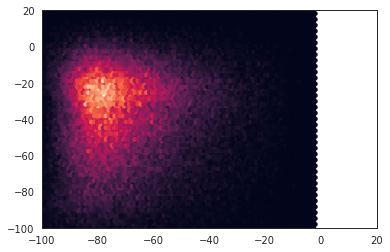

In [72]:
plt.hexbin(E1*1e-3, E2*1e-3)
plt.xlim([-100, 20])
plt.ylim([-100, 20])

In [55]:
ls=cdm_host
part='dark'
rlist1, vlist1, elist1 = make_lists(ls, part, [0,5])
rlist2, vlist2, elist2 = make_lists(ls, part, [15, 20])

In [56]:
import seaborn as sns
sns.set_style("white")

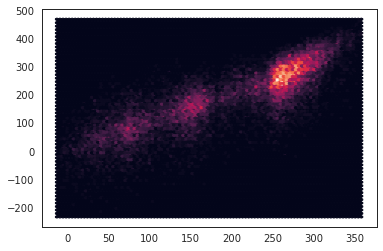

In [59]:
i=8
plt.hexbin(vlist1[i]*1e-3, elist1[i]*1e-3)

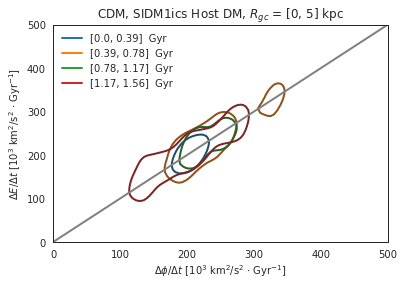

In [50]:
for i in [0, 1, 2, 3]:
    sns.kdeplot(vlist1[i]*1e-3, elist1[i]*1e-3, alpha=1, levels=1, label = '[' + str(round(time_samples[i],2)) + ", " + str(round(time_samples[i+1],2)) + ']  Gyr' ) #label=r'$R_{gc}$ = [0, 5] kpc')

#sns.kdeplot(vlist2[i], elist2[i], linewidth=0.5, alpha=0.75, levels=5, label=r'$R_{gc}$ = [5, 10] kpc')
#sns.kdeplot(vlist3[i], elist3[i], linewidth=0.5, alpha=0.5, levels=4, label=r'$R_{gc}$ = [7, 10] kpc')

plt.plot([-300, 500], [-300, 500], color='gray')
plt.xlim([0, 500])
plt.ylim([0, 500])
plt.xlabel(r'$\Delta \phi/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
plt.ylabel(r'$\Delta E/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
plt.legend(frameon=False, loc='upper left')
plt.title(r'CDM, SIDM1ics Host DM, $R_{gc}$ = [0, 5] kpc')
plt.savefig('plots/violentrelaxation_cdm_ss_sidm1_DM_0_5.pdf')

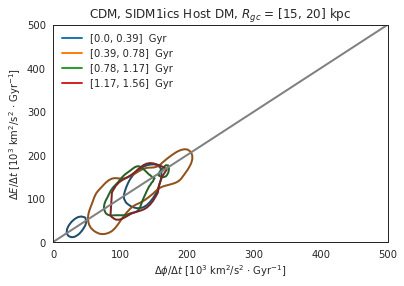

In [52]:
for i in [0, 1, 2, 3]:
    sns.kdeplot(vlist2[i]*1e-3, elist2[i]*1e-3, alpha=1, levels=1, label = '[' + str(round(time_samples[i],2)) + ", " + str(round(time_samples[i+1],2)) + ']  Gyr' ) #label=r'$R_{gc}$ = [0, 5] kpc')

#sns.kdeplot(vlist2[i], elist2[i], linewidth=0.5, alpha=0.75, levels=5, label=r'$R_{gc}$ = [5, 10] kpc')
#sns.kdeplot(vlist3[i], elist3[i], linewidth=0.5, alpha=0.5, levels=4, label=r'$R_{gc}$ = [7, 10] kpc')

plt.plot([-300, 500], [-300, 500], color='gray')
plt.xlim([0, 500])
plt.ylim([0, 500])
plt.xlabel(r'$\Delta \phi/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
plt.ylabel(r'$\Delta E/ \Delta t$ [$10^3$ km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
plt.legend(frameon=False, loc='upper left')
plt.title(r'CDM, SIDM1ics Host DM, $R_{gc}$ = [15, 20] kpc')
plt.savefig('plots/violentrelaxation_cdm_ss_sidm1_DM_15_20.pdf')

Text(0, 0.5, '$\\Delta E/ \\Delta t$ [km$^2$/s$^2$ $\\cdot$ Gyr$^{-1}$]')

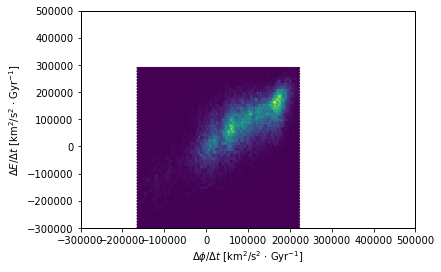

In [152]:
i=1
plt.hexbin(vlist2[i], elist2[i])
plt.xlim([-300000, 500000])
plt.ylim([-300000, 500000])
plt.xlabel(r'$\Delta \phi/ \Delta t$ [km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
plt.ylabel(r'$\Delta E/ \Delta t$ [km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')

Text(0, 0.5, '$\\Delta E/ \\Delta t$ [km$^2$/s$^2$ $\\cdot$ Gyr$^{-1}$]')

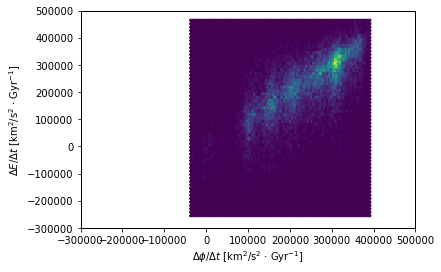

In [151]:
i=1
plt.hexbin(vlist1[i], elist1[i])
plt.xlim([-300000, 500000])
plt.ylim([-300000, 500000])
plt.xlabel(r'$\Delta \phi/ \Delta t$ [km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
plt.ylabel(r'$\Delta E/ \Delta t$ [km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')

Text(0, 0.5, '$\\Delta E/ \\Delta t$ [km$^2$/s$^2$ $\\cdot$ Gyr$^{-1}$]')

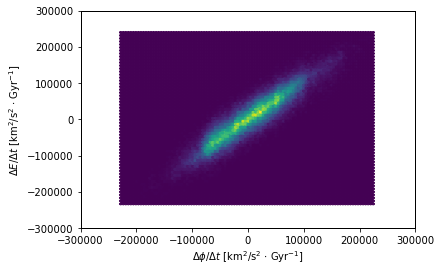

In [70]:
i=7
plt.hexbin(dVdt_list[i], dEdt_list[i])
plt.xlim([-300000, 300000])
plt.ylim([-300000, 300000])
plt.xlabel(r'$\Delta \phi/ \Delta t$ [km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
plt.ylabel(r'$\Delta E/ \Delta t$ [km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')

Text(0, 0.5, '$\\Delta E/ \\Delta t$ [km$^2$/s$^2$ $\\cdot$ Gyr$^{-1}$]')

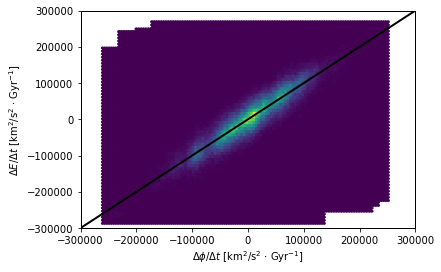

In [62]:
plt.plot([-300000, 300000], [-300000, 300000], color='k')

for i in range(0, 9):
    plt.hexbin(dVdt_list[i], dEdt_list[i])

    #plt.scatter(dVdt_list[i], dEdt_list[i], alpha=0.5, s=0.5)
    #plt.scatter(dVdt_list[3], dEdt_list[3], alpha=0.5, s=0.5)

plt.xlim([-300000, 300000])
plt.ylim([-300000, 300000])
plt.xlabel(r'$\Delta \phi/ \Delta t$ [km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')
plt.ylabel(r'$\Delta E/ \Delta t$ [km$^2$/s$^2$ $\cdot$ Gyr$^{-1}$]')

In [17]:
def energy_trends(ls, i, part):

    KE_list = []
    PE_list = []
    E_list = []
    r_array = np.linspace(0, 15, 45)
        
    for j in range(len(r_array)-1):
    
        if part=='dark':
    
            lsmask = (ls[i][part]['position.sph'][:,0] < r_array[+1:][j]) & (ls[i][part]['position.sph'][:,0] > r_array[:-1][j])

            KE_list.append(np.mean(kinetic_energy(ls, i, part, lsmask)))
            PE_list.append(np.mean(potential_energy(ls, i, part, lsmask)))
            E_list.append(np.mean(tot_energy(ls, i, part, lsmask)))
            
        elif part=='star':
    
            lsmask = (ls[i][part]['position.sph'][:,0] < r_array[+1:][j]) & (ls[i][part]['position.sph'][:,0] > r_array[:-1][j])

            KE_list.append(np.mean(kinetic_energy(ls, i, part, lsmask)))
            PE_list.append(np.mean(potential_energy(ls, i, part, lsmask)))
            E_list.append(np.mean(tot_energy(ls, i, part, lsmask)))
        
        rmid_array = (r_array[+1:]+r_array[:-1])/2
        
    return np.array(rmid_array), np.array(KE_list), np.array(PE_list), np.array(E_list)

In [18]:
def make_energy_panel(ls, filename):
    
    f, axs = plt.subplots(2, 3, sharey=False, sharex=True, figsize=(20, 8),)

    j=0
    ilist = range(len(ls))

    for i in ilist:
    
        colors = plt.cm.rainbow(np.linspace(0,1,len(ilist)))    
        rarray_D, ke_array_D, pe_array_D, e_array_D = energy_trends(ls, i, 'dark')
        rarray_S, ke_array_S, pe_array_S, e_array_S = energy_trends(ls, i, 'star')
        
        axs[0][0].plot(rarray_D, np.sqrt(ke_array_D), color=colors[j], linewidth=1, label=str(round(time_samples[i],2)) + ' Gyr')
        axs[1][0].plot(rarray_S, np.sqrt(ke_array_S), color=colors[j], linestyle='-', linewidth=1, label=str(round(time_samples[i],2)) + ' Gyr')

        
        axs[0][1].plot(rarray_D, np.sqrt(-1*pe_array_D), color=colors[j], linewidth=1, label=str(round(time_samples[i],2)) + ' Gyr')
        axs[1][1].plot(rarray_S, np.sqrt(-1*pe_array_S), color=colors[j], linestyle='-', linewidth=1,label=str(round(time_samples[i],2)) + ' Gyr')

        axs[0][2].plot(rarray_D, np.sqrt(-e_array_D), color=colors[j], linewidth=1, label=str(round(time_samples[i],2)) + ' Gyr')
        axs[1][2].plot(rarray_S, np.sqrt(-e_array_S), color=colors[j], linewidth=1, linestyle='-',label=str(round(time_samples[i],2)) + ' Gyr')
        
        j+=1
    
    axs[0][0].set_ylim([50, 180])
    axs[1][0].set_ylim([60, 130])
    axs[0][0].set_ylabel(r'$\sqrt{\langle K \rangle}}$ [km/s]', fontsize=14)
    axs[1][0].set_ylabel(r'$\sqrt{\langle K \rangle}}$ [km/s]', fontsize=14)
    axs[1][0].set_xlabel(r'$R_{gc}$ [kpc]', fontsize=14)
    axs[0][1].set_title('Host Dark Matter', fontsize=14)
    axs[1][1].set_title('Host Disk Stars', fontsize=14)
    
    axs[0][1].set_ylim([300, 430])
    axs[1][1].set_ylim([300, 430])
    axs[0][1].set_ylabel(r'$\sqrt{-\langle U \rangle}}$ [km/s]', fontsize=14)
    axs[1][1].set_ylabel(r'$\sqrt{-\langle U \rangle}}$ [km/s]', fontsize=14)
    axs[1][1].set_xlabel(r'$R_{gc}$ [kpc]', fontsize=14)
    
    axs[0][2].set_ylim([270, 430])
    axs[1][2].set_ylim([270, 430])
    axs[0][2].set_ylabel(r'$\sqrt{-\langle K+U \rangle}}$ [km/s]', fontsize=14)
    axs[1][2].set_ylabel(r'$\sqrt{-\langle K+U \rangle}}$ [km/s]', fontsize=14)
    axs[1][2].set_xlabel(r'$R_{gc}$ [kpc]', fontsize=14)
    
    plt.legend(frameon=False, fontsize=10, bbox_to_anchor=(1, 1))
    #plt.savefig('plots/'+ filename)
    plt.tight_layout()

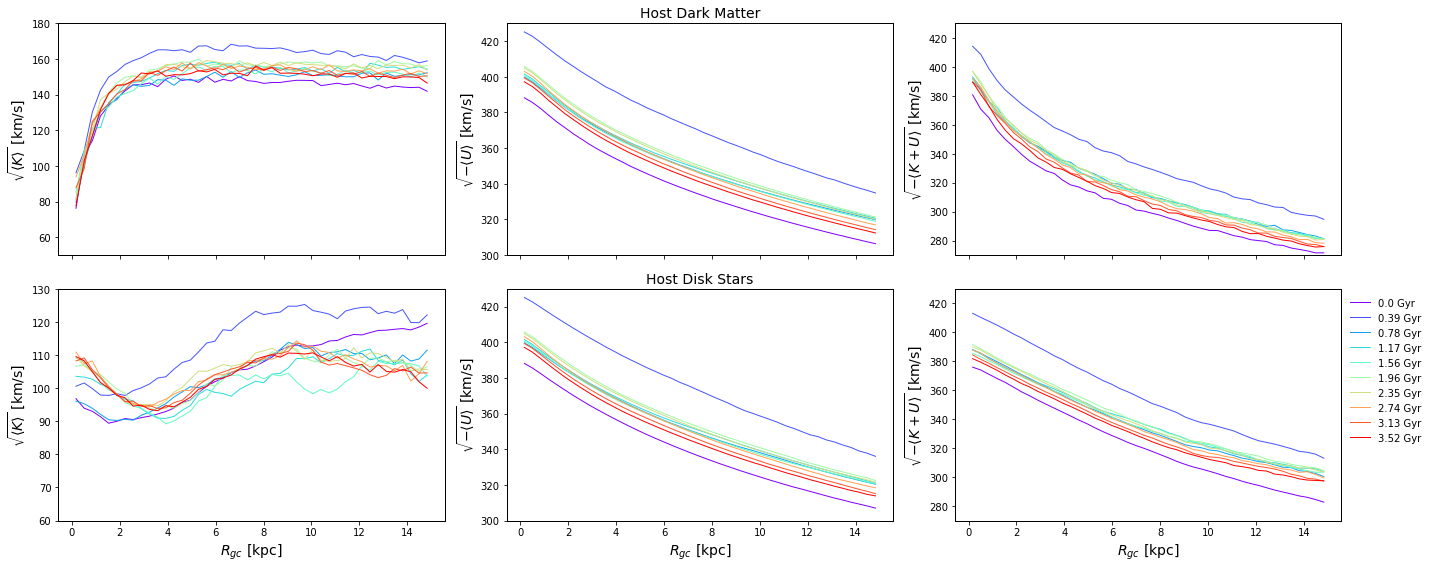

In [19]:
make_energy_panel(cdm_host, 'test')

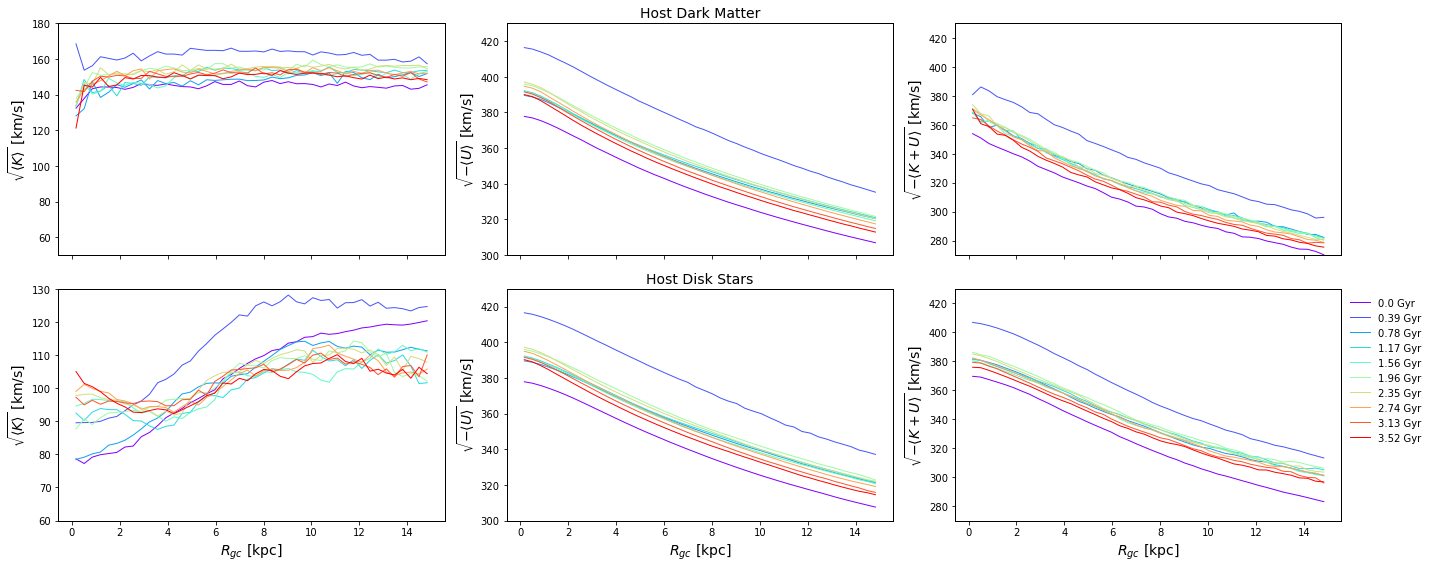

In [20]:
make_energy_panel(cdm_ss_host, 'test')

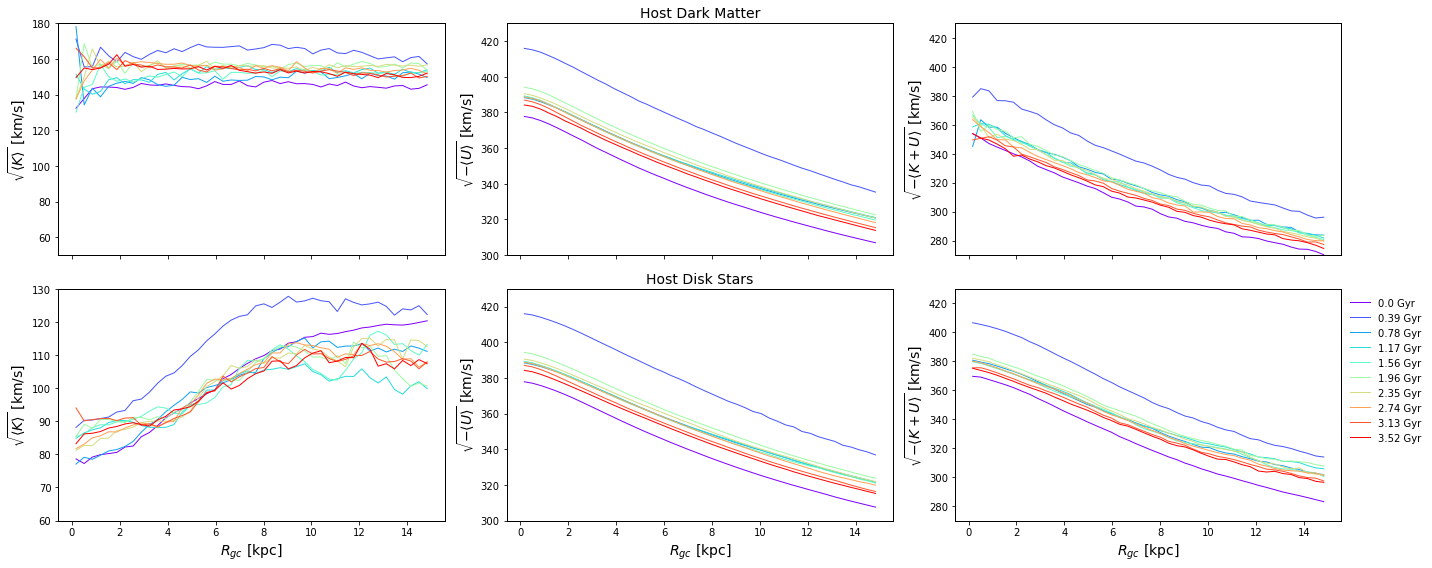

In [21]:
make_energy_panel(sidm1_host, 'test')

# Host Disk Spatial Distributions

In [22]:
def plot_2Dimage(ls, i, Rgc_limits, file_prefix):
   
    parts = ['star']
    dim_to_plot = [[0, 2], [1, 2], [0, 1]]
    Rgc_min = Rgc_limits[0]
    Rgc_max = Rgc_limits[1]
    
    dimension_string=["$x$", "$y$", "$z$"]
    label = 'position'
    
    fig, axs = plt.subplots((len(parts)), len(dim_to_plot), figsize=(15, 10))

    
    for k in range(len(parts)):
        
        
        if parts[k]== 'star':
            color_map =  plt.cm.inferno 
            ls_mask = (ls[i]['star']['position.sph'][:,0] < Rgc_max) & (ls[i]['star']['position.sph'][:,0] > Rgc_min)

            
            xrange = [15, 15, 15]
            vrange = [0, 1e4]
        
        limits=np.array([[-xrange[0], xrange[0]], [-xrange[1], xrange[1]], [-xrange[2], xrange[2]]])
    
        my_cmap = copy.copy(color_map) # copy the default cmap
        my_cmap.set_bad((1e-4, 1e-4, 1e-4)) #so that all bad pixels (i.e., with values = 0) show up black
    
    
        #histogram the data in 3D position space
        hist_valuess, (hist_xs, hist_ys, hist_zs) = np.histogramdd((ls[i][parts[k]][label][:,0][ls_mask],\
                                                                    ls[i][parts[k]][label][:,1][ls_mask], \
                                                                    ls[i][parts[k]][label][:,2][ls_mask]),\
                                                                    bins=500, range = limits, normed=False)        
        # convert to 3-d density
        hist_valuess /= np.diff(hist_xs)[0] * np.diff(hist_ys)[0] * np.diff(hist_zs)[0]    
        
    
        for j in range(len(dim_to_plot)):
    
            dim_project = np.setdiff1d([0, 1, 2], dim_to_plot[j])
            hist_valuess_project = np.max(hist_valuess, dim_project[0] )
        
            axs[j].imshow(hist_valuess_project.transpose(), cmap = my_cmap, aspect=1, vmin=vrange[0], vmax=vrange[1],\
                   interpolation='bilinear', extent=np.concatenate(limits[dim_to_plot[j]]))
             #norm=colors.LogNorm()
    
            axs[j].set_xlabel(dimension_string[dim_to_plot[j][0]]+ ' [kpc]')
            axs[j].set_ylabel(dimension_string[dim_to_plot[j][1]]+ ' [kpc]')
    
    axs[2].text(-xrange[0]*0.9, xrange[0]*0.8, str(round(time_array[i],2))+' Gyr', color='white', fontsize=14)
    
    axs[1].set_title(r'$R_{gc}$ = [' + str(Rgc_min) + ","+ str(Rgc_max) + '] kpc, t =' + str(round(time_array[i], 2)) + ' Gyr' , fontsize=14)

    
    fig.tight_layout()
        
    #fig.savefig(plot_directory + file_prefix + '-' + plot_type + '-' + str(i) + '.png')
    #plt.close('all')
   

In [23]:
def plot_2Dimage(ls, i, plot_type, Rgc_limits, file_prefix):
   
    parts = ['star']
    dim_to_plot = [[0, 2], [1, 2], [0, 1]]
    Rgc_min = Rgc_limits[0]
    Rgc_max = Rgc_limits[1]
    
    if plot_type == 'cart_pos' :
        dimension_string=["$x$", "$y$", "$z$"]
        label = 'position'
    elif plot_type == 'sph_vel' :
        dimension_string=[r"$v_r$", r"$v_{\theta}$", r"$v_{\phi}$"]
        label = 'velocity.sph'
    
    fig, axs = plt.subplots((len(parts)), len(dim_to_plot), figsize=(15, 10))

    
    for k in range(len(parts)):
        
        
        if parts[k]== 'star':
            color_map =  plt.cm.inferno 
            ls_mask = (ls[i]['star']['position.sph'][:,0] < Rgc_max) & (ls[i]['star']['position.sph'][:,0] > Rgc_min)

            if plot_type == 'cart_pos' :
                xrange = [15, 15, 15]
                vrange = [0, 1e4]
            elif plot_type == 'sph_vel' :
                xrange = [500, 500, 500]
                vrange = [0, 1e-1]
            
        elif parts[k] == 'dark':
            color_map = plt.cm.viridis #plt.get_cmap('bbw')
            ls_mask = (ls[i]['dark']['position.sph'][:,0] < Rgc_max) & (ls[i]['dark']['position.sph'][:,0] > Rgc_min)
            
            if plot_type == 'cart_pos' : 
                xrange = [200, 200, 200]
                vrange = [0, 100]
            elif plot_type == 'sph_vel' :
                xrange = [500, 500, 500]
                vrange = [0, 1e-1]
        
        limits=np.array([[-xrange[0], xrange[0]], [-xrange[1], xrange[1]], [-xrange[2], xrange[2]]])
    
        my_cmap = copy.copy(color_map) # copy the default cmap
        my_cmap.set_bad((1e-4, 1e-4, 1e-4)) #so that all bad pixels (i.e., with values = 0) show up black
    
    
        #histogram the data in 3D position space
        hist_valuess, (hist_xs, hist_ys, hist_zs) = np.histogramdd((ls[i][parts[k]][label][:,0][ls_mask],\
                                                                    ls[i][parts[k]][label][:,1][ls_mask], \
                                                                    ls[i][parts[k]][label][:,2][ls_mask]),\
                                                                    bins=500, range = limits, normed=False)        
        # convert to 3-d density
        hist_valuess /= np.diff(hist_xs)[0] * np.diff(hist_ys)[0] * np.diff(hist_zs)[0]    
        
    
        for j in range(len(dim_to_plot)):
    
            dim_project = np.setdiff1d([0, 1, 2], dim_to_plot[j])
            hist_valuess_project = np.max(hist_valuess, dim_project[0] )
        
            axs[j].imshow(hist_valuess_project.transpose(), cmap = my_cmap, aspect=1, vmin=vrange[0], vmax=vrange[1],\
                   interpolation='bilinear', extent=np.concatenate(limits[dim_to_plot[j]]))
             #norm=colors.LogNorm()
    
            axs[j].set_xlabel(dimension_string[dim_to_plot[j][0]]+ ' [kpc]')
            axs[j].set_ylabel(dimension_string[dim_to_plot[j][1]]+ ' [kpc]')
    
    axs[2].text(-xrange[0]*0.9, xrange[0]*0.8, str(round(time_samples[i],2))+' Gyr', color='white', fontsize=14)
    
    axs[1].set_title(r'$R_{gc}$ = [' + str(Rgc_min) + ","+ str(Rgc_max) + '] kpc, t =' + str(round(time_samples[i], 2)) + ' Gyr' , fontsize=14)

    
    fig.tight_layout()
        
    #fig.savefig(plot_directory + file_prefix + '-' + plot_type + '-' + str(i) + '.png')
    #plt.close('all')
   

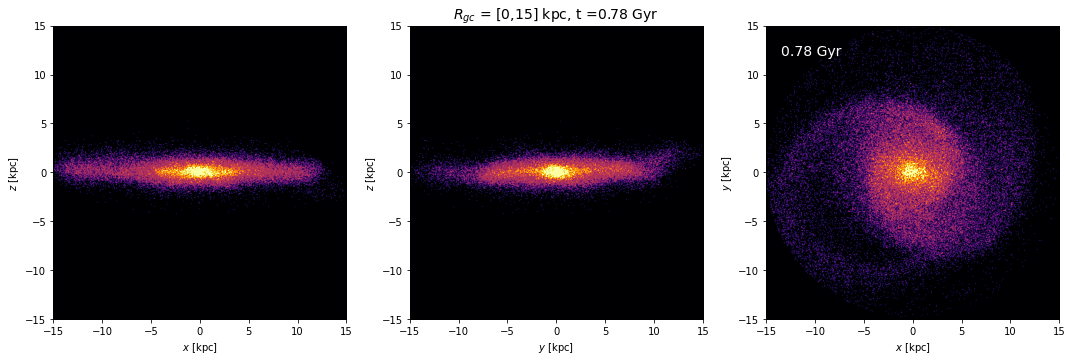

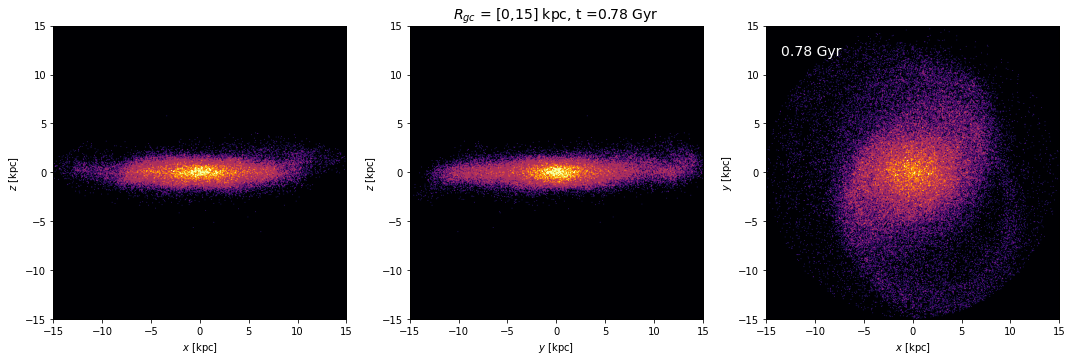

In [27]:
i=2
plot_2Dimage(cdm_host, i, 'cart_pos', [0, 15], 'temp')
plot_2Dimage(sidm1_host, i, 'cart_pos', [0, 15], 'temp')

In [35]:
def plot_2Dimage(ls, Rgc_limits, file_prefix):
   
    parts = ['star']
    dim_to_plot = [[0, 1]]
    Rgc_min = Rgc_limits[0]
    Rgc_max = Rgc_limits[1]
    
    ls_list = [cdm_host, cdm_ss_host, sidm1_host]
    
    dimension_string=["$x$", "$y$", "$z$"]
    label = 'position'
        
    fig, axs = plt.subplots(2, len(ls_list), figsize=(12,7))

    color_map =  plt.cm.inferno
    my_cmap = copy.copy(color_map) # copy the default cmap
    my_cmap.set_bad((1e-4, 1e-4, 1e-4)) #so that all bad pixels (i.e., with values = 0) show up black
    xrange = [15, 15, 15]
    vrange = [0, 1e4]
    
    for i in range(2):
        
        for k in range(len(ls_list)):
        
            ls=ls_list[k]
        
            ls_mask = (ls[i]['star']['position.sph'][:,0] < Rgc_max) & (ls[i]['star']['position.sph'][:,0] > Rgc_min)
                
            limits=np.array([[-xrange[0], xrange[0]], [-xrange[1], xrange[1]], [-xrange[2], xrange[2]]])
    
            #histogram the data in 3D position space
            hist_valuess, (hist_xs, hist_ys, hist_zs) = np.histogramdd((ls[i]['star'][label][:,0][ls_mask],\
                                                                    ls[i]['star'][label][:,1][ls_mask], \
                                                                    ls[i]['star'][label][:,2][ls_mask]),\
                                                                    bins=500, range = limits, normed=False)        
            # convert to 3-d density
            hist_valuess /= np.diff(hist_xs)[0] * np.diff(hist_ys)[0] * np.diff(hist_zs)[0]    
    
    
            dim_project = np.setdiff1d([0, 1, 2], dim_to_plot[0])
            hist_valuess_project = np.max(hist_valuess, dim_project[0] )
        
            axs[i][k].imshow(hist_valuess_project.transpose(), cmap = my_cmap, aspect=1, vmin=vrange[0], vmax=vrange[1],\
                       interpolation='bilinear', extent=np.concatenate(limits[dim_to_plot[0]]))
             #norm=colors.LogNorm()
    
            axs[i][k].set_xlabel(dimension_string[dim_to_plot[0][0]]+ ' [kpc]')
            axs[i][k].set_ylabel(dimension_string[dim_to_plot[0][1]]+ ' [kpc]')
    
        axs[i][2].text(-xrange[0]*0.9, xrange[0]*0.8, str(round(time_samples[i],2))+' Gyr', color='white', fontsize=14)
    
        axs[i][0].set_title('CDM')
        axs[i][1].set_title('CDM_ss')
        axs[i][2].set_title('SIDM1')
    #axs[1].set_title(r'$R_{gc}$ = [' + str(Rgc_min) + ","+ str(Rgc_max) + '] kpc, t =' + str(round(time_samples[i], 2)) + ' Gyr' , fontsize=14)

    
    fig.tight_layout()
        
    #fig.savefig(plot_directory + file_prefix + '-' + plot_type + '-' + str(i) + '.png')
    #plt.close('all')
   

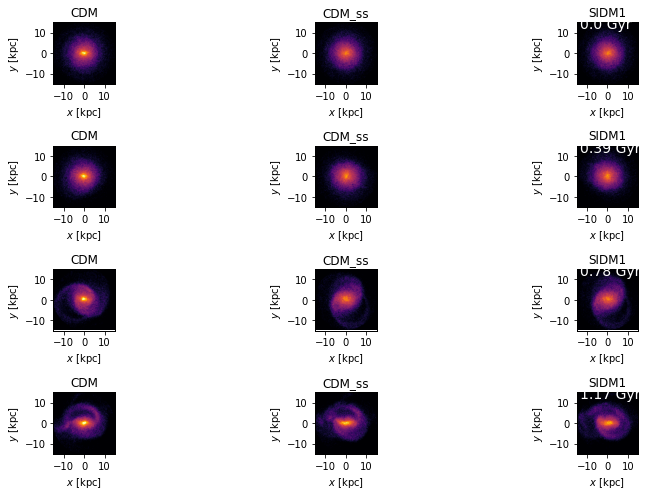

In [34]:
plot_2Dimage(sidm1_host, [0, 15], 'temp')

# Spherical Velocity Distributions for Satellite Debris

In [11]:
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

def sat_1Dsphvel(i, Rgc_limits, file_prefix):

    parts = ['dark', 'star']
    Rgc_min = Rgc_limits[0]
    Rgc_max = Rgc_limits[1]
    
    fig, axs = plt.subplots(len(parts), 3, sharey=False, sharex=True, figsize=(12, 7))
    linewidth = 2
    
    for k in range(len(parts)):
        
        if parts[k] == 'dark':
            cdm_color = 'darkcyan'
            sidm1_color = 'darkorchid'
            sidm10v_color = 'mediumvioletred'
            label = ', dark'
        elif parts[k] == 'star':
            cdm_color = 'limegreen'
            sidm1_color = 'orangered'
            sidm10v_color = 'darkorange'
            label =', star'
        cdm_mask = (cdm_sat[i][parts[k]]['position.sph'][:,0] < Rgc_max) & (cdm_sat[i][parts[k]]['position.sph'][:,0] > Rgc_min)
        sidm1d_mask = (sidm1d_sat[i][parts[k]]['position.sph'][:,0] < Rgc_max) & (sidm1d_sat[i][parts[k]]['position.sph'][:,0] > Rgc_min)
        #sidm1_mask = (sidm1_sat[i][parts[k]]['position.sph'][:,0] < Rgc_max) & (sidm1_sat[i][parts[k]]['position.sph'][:,0] > Rgc_min)
        #sidm10v_mask = (sidm10v_sat[i][parts[k]]['position.sph'][:,0] < Rgc_max) & (sidm10v_sat[i][parts[k]]['position.sph'][:,0] > Rgc_min)

        axs[k][0].hist(cdm_sat[i][parts[k]]['velocity.sph'][:,0][cdm_mask], density=True, bins=30, histtype='step', color=cdm_color, range=[-500,500], linewidth=linewidth, label='CDM'+label)
        axs[k][0].hist(sidm1d_sat[i][parts[k]]['velocity.sph'][:,0][sidm1d_mask], density=True, bins=30, histtype='step', color=sidm1_color, range=[-400,400], linestyle='dashed', linewidth=linewidth, label='SIDM1d'+label)
        #axs[k][0].hist(sidm1_sat[i][parts[k]]['velocity.sph'][:,0][sidm1_mask], density=True, bins=30, histtype='step', color=sidm1_color, range=[-400,400], linestyle='dashed', linewidth=linewidth, label='SIDM1'+label)
        #axs[k][0].hist(sidm10v_sat[i][parts[k]]['velocity.sph'][:,0][sidm10v_mask], density=True, bins=30, histtype='step', color=sidm10v_color, range=[-400,400], linestyle='dotted', linewidth=linewidth, label='SIDM10v'+label)
        
        axs[k][1].hist(cdm_sat[i][parts[k]]['velocity.sph'][:,1][cdm_mask], density=True, bins=30, histtype='step', color=cdm_color, range=[-500,500], linewidth=linewidth)
        axs[k][1].hist(sidm1d_sat[i][parts[k]]['velocity.sph'][:,1][sidm1d_mask], density=True, bins=30, histtype='step', color=sidm1_color, range=[-400,400], linestyle='dashed', linewidth=linewidth)
        #axs[k][1].hist(sidm1_sat[i][parts[k]]['velocity.sph'][:,1][sidm1_mask], density=True, bins=30, histtype='step', color=sidm1_color, range=[-400,400], linestyle='dashed', linewidth=linewidth)
        #axs[k][1].hist(sidm10v_sat[i][parts[k]]['velocity.sph'][:,1][sidm10v_mask], density=True, bins=30, histtype='step', color=sidm10v_color, range=[-400,400], linestyle='dotted', linewidth=linewidth)
        
        axs[k][2].hist(cdm_sat[i][parts[k]]['velocity.sph'][:,2][cdm_mask], density=True, bins=30, histtype='step', color=cdm_color, range=[-500,500], linewidth=linewidth,label='CDM'+label)
        axs[k][2].hist(sidm1d_sat[i][parts[k]]['velocity.sph'][:,2][sidm1d_mask], density=True, bins=30, histtype='step', color=sidm1_color, range=[-400,400], linestyle='dashed', linewidth=linewidth, label='SIDM1'+label)
        #axs[k][2].hist(sidm1_sat[i][parts[k]]['velocity.sph'][:,2][sidm1_mask], density=True, bins=30, histtype='step', color=sidm1_color, range=[-400,400], linestyle='dashed', linewidth=linewidth, label='SIDM1'+label)
        #axs[k][2].hist(sidm10v_sat[i][parts[k]]['velocity.sph'][:,2][sidm10v_mask], density=True, bins=30, histtype='step', color=sidm10v_color, range=[-400,400], linestyle='dotted', linewidth=linewidth, label='SIDM10v'+label)
        
        if parts[k]=='dark':
            axs[k][0].set_ylim([0, 0.004])
            axs[k][1].set_ylim([0, 0.006])
            axs[k][2].set_ylim([0, 0.006])
        elif parts[k]=='star':
            axs[k][0].set_ylim([0, 0.02])
            axs[k][1].set_ylim([0, 0.02])
            axs[k][2].set_ylim([0, 0.02])
        
        axs[k][2].legend(frameon=False, fontsize=12, loc='upper left')

    axs[0][0].set_ylabel('Norm. Distribution', fontsize=14)
    axs[1][0].set_ylabel('Norm. Distribution', fontsize=14)
    axs[1][0].set_xlabel(r'$v_r$ [km/s]', fontsize=14)
    axs[1][1].set_xlabel(r'$v_{\theta}$ [km/s]', fontsize=14)
    axs[1][2].set_xlabel(r'$v_{\phi}$ [km/s]', fontsize=14)
    
    axs[0][1].set_title(r'$R_{gc}$ = [' + str(Rgc_min) + ","+ str(Rgc_max) + '] kpc, t =' + str(round(time_array[i],2)) + ' Gyr' , fontsize=14)
    fig.tight_layout()
    #fig.savefig(plot_directory + file_prefix + '-' + str(i) + '.png')
    #plt.close('all')

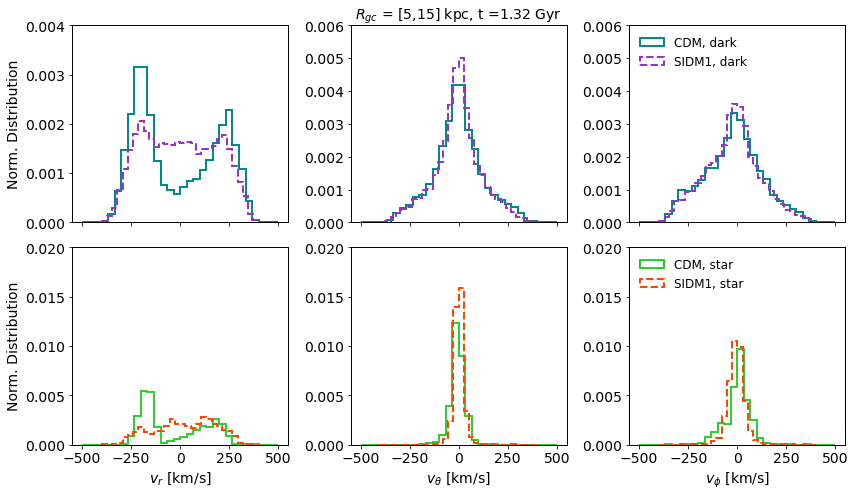

In [26]:
sat_1Dsphvel(27, [5, 15], 'temp')

In [17]:
for i in range(len(cdm_sat)):
    sat_1Dsphvel(i, [5, 15], 'sat-1D-sph-vel')

/home/mlisanti/anaconda3/envs/galaxy/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mlisanti/anaconda3/envs/galaxy/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mlisanti/anaconda3/envs/galaxy/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mlisanti/anaconda3/envs/galaxy/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mlisanti/anaconda3/envs/galaxy/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mlisanti/anaconda3/envs/galaxy/lib/python3.7/site-packages/numpy/lib/histo

# Cylindrical Distributions for Host Disk

In [102]:
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

def host_1Dcylvel(i, R_limits, file_prefix):

    parts = ['dark', 'star']
    R_min = R_limits[0]
    R_max = R_limits[1]
    
    fig, axs = plt.subplots(len(parts), 3, sharey=False, sharex=True, figsize=(12, 7))
    linewidth = 2
    
    rrange = 500
    
    for k in range(len(parts)):
        
        if parts[k] == 'dark':
            cdm_color = 'darkcyan'
            sidm1_color = 'darkorchid'
            sidm10v_color = 'mediumvioletred'
            label = ', dark'
        elif parts[k] == 'star':
            cdm_color = 'limegreen'
            sidm1_color = 'orangered'
            sidm10v_color = 'darkorange'
            label =', star'
        cdm_mask = (cdm_host[i][parts[k]]['position.cyl'][:,0] < R_max) & (cdm_host[i][parts[k]]['position.cyl'][:,0] > R_min)
        sidm1d_mask = (sidm1d_host[i][parts[k]]['position.cyl'][:,0] < R_max) & (sidm1d_host[i][parts[k]]['position.cyl'][:,0] > R_min)
        sidm1_mask = (sidm1_host[i][parts[k]]['position.cyl'][:,0] < R_max) & (sidm1_host[i][parts[k]]['position.cyl'][:,0] > R_min)
        #sidm10v_mask = (sidm10v_host[i][parts[k]]['position.cyl'][:,0] < R_max) & (sidm10v_host[i][parts[k]]['position.cyl'][:,0] > R_min)
        
        axs[k][0].hist(cdm_host[i][parts[k]]['velocity.cyl'][:,0][cdm_mask], density=True, bins=30, histtype='step', color=cdm_color, range=[-rrange, rrange], linewidth=linewidth, label='CDM'+label)
        axs[k][0].hist(sidm1d_host[i][parts[k]]['velocity.cyl'][:,0][sidm1d_mask], density=True, bins=30, histtype='step', color=sidm1_color, range=[-rrange, rrange], linestyle='dashed', linewidth=linewidth, label='SIDM1ic'+label)
        axs[k][0].hist(sidm1_host[i][parts[k]]['velocity.cyl'][:,0][sidm1_mask], density=True, bins=30, histtype='step', color=sidm1_color, range=[-rrange, rrange], linestyle='dashed', linewidth=linewidth, label='SIDM1'+label)
        #axs[k][0].hist(sidm10v_host[i][parts[k]]['velocity.cyl'][:,0][sidm10v_mask], density=True, bins=30, histtype='step', color=sidm10v_color, range=[-rrange, rrange], linestyle='dotted', linewidth=linewidth, label='SIDM10v'+label)
        
        axs[k][1].hist(cdm_host[i][parts[k]]['velocity.cyl'][:,1][cdm_mask], density=True, bins=30, histtype='step', color=cdm_color, range=[-rrange, rrange], linewidth=linewidth)
        axs[k][1].hist(sidm1d_host[i][parts[k]]['velocity.cyl'][:,1][sidm1d_mask], density=True, bins=30, histtype='step', color=sidm1_color, range=[-rrange, rrange], linestyle='dashed', linewidth=linewidth)
        axs[k][1].hist(sidm1_host[i][parts[k]]['velocity.cyl'][:,1][sidm1_mask], density=True, bins=30, histtype='step', color=sidm1_color, range=[-rrange, rrange], linestyle='dashed', linewidth=linewidth)
        #axs[k][1].hist(sidm10v_host[i][parts[k]]['velocity.cyl'][:,1][sidm10v_mask], density=True, bins=30, histtype='step', color=sidm10v_color, range=[-rrange, rrange], linestyle='dotted', linewidth=linewidth)
        
        axs[k][2].hist(cdm_host[i][parts[k]]['velocity.cyl'][:,2][cdm_mask], density=True, bins=30, histtype='step', color=cdm_color, range=[-rrange, rrange], linewidth=linewidth,label='CDM'+label)
        axs[k][2].hist(sidm1d_host[i][parts[k]]['velocity.cyl'][:,2][sidm1d_mask], density=True, bins=30, histtype='step', color=sidm1_color, range=[-rrange, rrange], linestyle='dashed', linewidth=linewidth, label='SIDM1ic'+label)
        axs[k][2].hist(sidm1_host[i][parts[k]]['velocity.cyl'][:,2][sidm1_mask], density=True, bins=30, histtype='step', color=sidm1_color, range=[-rrange, rrange], linestyle='dashed', linewidth=linewidth, label='SIDM1'+label)
        #axs[k][2].hist(sidm10v_host[i][parts[k]]['velocity.cyl'][:,2][sidm10v_mask], density=True, bins=30, histtype='step', color=sidm10v_color, range=[-rrange, rrange], linestyle='dotted', linewidth=linewidth, label='SIDM10v'+label)
        
        axs[k][2].legend(frameon=False, fontsize=12, loc='upper left')

    axs[0][0].set_ylim([0, 0.005])
    axs[0][1].set_ylim([0, 0.005])
    axs[0][2].set_ylim([0, 0.005])
    axs[1][0].set_ylim([0, 0.02])
    axs[1][0].set_xlim([-rrange, rrange])
    axs[1][1].set_ylim([0, 0.02])
    axs[1][1].set_xlim([-rrange, rrange])
    axs[1][2].set_ylim([0, 0.02])
    axs[1][2].set_xlim([-rrange, rrange])
        
    axs[0][0].set_ylabel('Norm. Distribution', fontsize=14)
    axs[1][0].set_ylabel('Norm. Distribution', fontsize=14)
    axs[1][0].set_xlabel(r'$v_R$ [km/s]', fontsize=14)
    axs[1][1].set_xlabel(r'$v_{\phi}$ [km/s]', fontsize=14)
    axs[1][2].set_xlabel(r'$v_{z}$ [km/s]', fontsize=14)
    
    axs[0][1].set_title(r'$R$ = [' + str(R_min) + ","+ str(R_max) + '] kpc, t =' + str(round(time_array[i],2)) + ' Gyr' , fontsize=14)
    fig.tight_layout()
    #fig.savefig(plot_directory + file_prefix + '-' + str(i) + '.png')
    #plt.close('all')

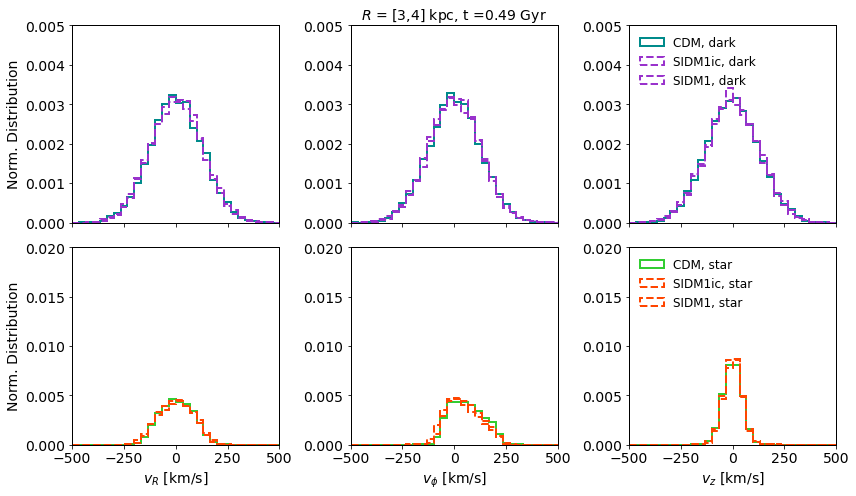

In [113]:
host_1Dcylvel(5, [3,4], 'host-1D-cyl-vel')

In [29]:
for i in range(len(cdm_host)):
    host_1Dcylvel(i, [6, 10], 'host-1D-cyl-vel')

In [18]:
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

def host_1Dz(i, R_limits, file_prefix):

    parts = ['dark', 'star']
    R_min = R_limits[0]
    R_max = R_limits[1]
    
    fig, axs = plt.subplots(len(parts), 1, sharey=False, sharex=True, figsize=(6, 8))
    linewidth = 2
    
    for k in range(len(parts)):
        
        if parts[k] == 'dark':
            cdm_color = 'darkcyan'
            sidm1_color = 'darkorchid'
            sidm10v_color = 'mediumvioletred'
            label = ', dark'
        elif parts[k] == 'star':
            cdm_color = 'limegreen'
            sidm1_color = 'orangered'
            sidm10v_color = 'darkorange'
            label =', star'
        cdm_mask = (cdm_host[i][parts[k]]['position.cyl'][:,0] < R_max) & (cdm_host[i][parts[k]]['position.cyl'][:,0] > R_min)
        sidm1_mask = (sidm1_host[i][parts[k]]['position.cyl'][:,0] < R_max) & (sidm1_host[i][parts[k]]['position.cyl'][:,0] > R_min)
        sidm10v_mask = (sidm10v_host[i][parts[k]]['position.cyl'][:,0] < R_max) & (sidm10v_host[i][parts[k]]['position.cyl'][:,0] > R_min)
        
        axs[k].hist(cdm_host[i][parts[k]]['position.cyl'][:,2][cdm_mask], density=True, bins=30, histtype='step', color=cdm_color, range=[-5, 5], linewidth=linewidth, label='CDM'+label)
        axs[k].hist(sidm1_host[i][parts[k]]['position.cyl'][:,2][sidm1_mask], density=True, bins=30, histtype='step', color=sidm1_color, range=[-5,5], linestyle='dashed', linewidth=linewidth, label='SIDM1'+label)
        axs[k].hist(sidm10v_host[i][parts[k]]['position.cyl'][:,2][sidm10v_mask], density=True, bins=30, histtype='step', color=sidm10v_color, range=[-5,5], linestyle='dashed', linewidth=linewidth, label='SIDM10v'+label)
        
        axs[k].legend(frameon=False, fontsize=12, loc='upper left')

    axs[0].set_ylim([0, 0.4])
    axs[1].set_ylim([0, 1])
        
    axs[0].set_ylabel('Normalized Distribution', fontsize=14)
    axs[1].set_ylabel('Normalized Distribution', fontsize=14)
    axs[1].set_xlabel(r'$z$ [kpc]', fontsize=14)

    axs[0].set_title(r'$R$ = [' + str(R_min) + ","+ str(R_max) + '] kpc, t =' + str(round(time_array[i],2)) + ' Gyr' , fontsize=14)
    fig.tight_layout()
    #fig.savefig(plot_directory + file_prefix + '-' + str(i) + '.png')
    #plt.close('all')

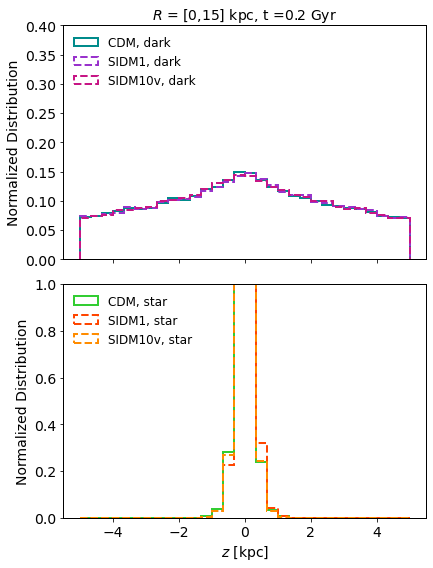

In [20]:
host_1Dz(4, [0,15], 'temp')

In [23]:
for i in range(len(cdm_host)):
    host_1Dz(i, [6, 10], 'host-1D-z')

# Plot Orbit of Satellite

In [19]:
def find_com(ls):

    total_M = np.sum(ls['mass'])
    
    x_num = np.sum(ls['position'][:,0]*ls['mass'])
    y_num = np.sum(ls['position'][:,1]*ls['mass'])
    z_num = np.sum(ls['position'][:,2]*ls['mass'])
    
    R_com = np.sqrt(x_num**2 + y_num**2 + z_num**2)/total_M
    
    return x_num/total_M, y_num/total_M, z_num/total_M, R_com

In [26]:
tplot = []
zplot_cdm = []
zplot_sidm1 = []
zplot_sidm10v = []
zplot_sidm1d = []

xplot_cdm = []
xplot_sidm1 = []
xplot_sidm10v = []
xplot_sidm1d = []

Rplot_cdm = []
Rplot_sidm1 = []
Rplot_sidm10v = []
Rplot_sidm1d = []

for i in range(0, len(sidm1d_sat)):
    tplot.append(time_array[i])
    xplot_cdm.append(find_com(cdm_sat[i]['star'])[0])
    xplot_sidm1d.append(find_com(sidm1d_sat[i]['star'])[0])
    #xplot_sidm1.append(find_com(sidm1_sat[i]['star'])[0])
    #xplot_sidm10v.append(find_com(sidm10v_sat[i]['star'])[0])
    zplot_cdm.append(find_com(cdm_sat[i]['star'])[2])
    zplot_sidm1d.append(find_com(sidm1d_sat[i]['star'])[2])
    #zplot_sidm1.append(find_com(sidm1_sat[i]['star'])[2])
    #plot_sidm10v.append(find_com(sidm10v_sat[i]['star'])[2])
    Rplot_cdm.append(find_com(cdm_sat[i]['star'])[3])
    Rplot_sidm1d.append(find_com(sidm1d_sat[i]['star'])[3])
    #Rplot_sidm1.append(find_com(sidm1_sat[i]['star'])[3])
    #plot_sidm10v.append(find_com(sidm10v_sat[i]['star'])[3])

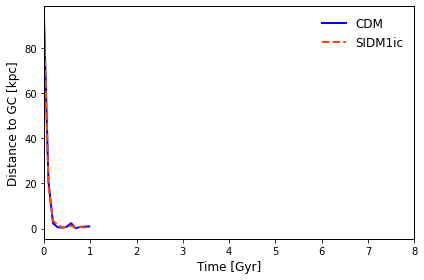

In [27]:
plt.figure(figsize=(6,4))

plt.plot(tplot, Rplot_cdm, label='CDM', color='blue')
#plt.plot(tplot, Rplot_sidm1, linestyle='dashed', label='SIDM1', color='orangered')
plt.plot(tplot, Rplot_sidm1d, linestyle='dashed', label='SIDM1ic', color='orangered')

#plt.plot(tplot, Rplot_sidm10v, linestyle='dashed', label='SIDM10v', color='darkorange')
plt.xlim([0, 8])
#plt.ylim([-10,10])
plt.xlabel('Time [Gyr]', fontsize=12)
plt.ylabel('Distance to GC [kpc]', fontsize=12)
plt.legend(frameon=False, fontsize=12)
plt.tight_layout()
plt.savefig(plot_directory + 'distance_vs_time_sat.pdf')

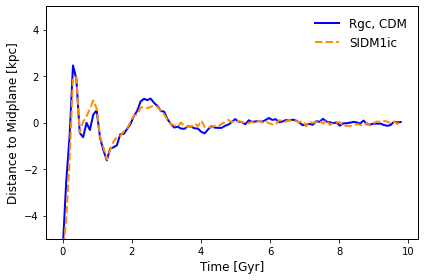

In [20]:
plt.figure(figsize=(6,4))

plt.plot(tplot, zplot_cdm, label='Rgc, CDM', color='blue')
#plt.plot(tplot, zplot_sidm1, linestyle='dashed', label='SIDM1', color='orangered')
plt.plot(tplot, zplot_sidm1d, linestyle='dashed', label='SIDM1ic', color='darkorange')
#plt.xlim([0, 2.5])
plt.ylim([-5,5])
plt.xlabel('Time [Gyr]', fontsize=12)
plt.ylabel('Distance to Midplane [kpc]', fontsize=12)
plt.legend(frameon=False, fontsize=12)
plt.tight_layout()
plt.savefig(plot_directory + '/distance_vs_time_sat.pdf')

1.8582 Gyr


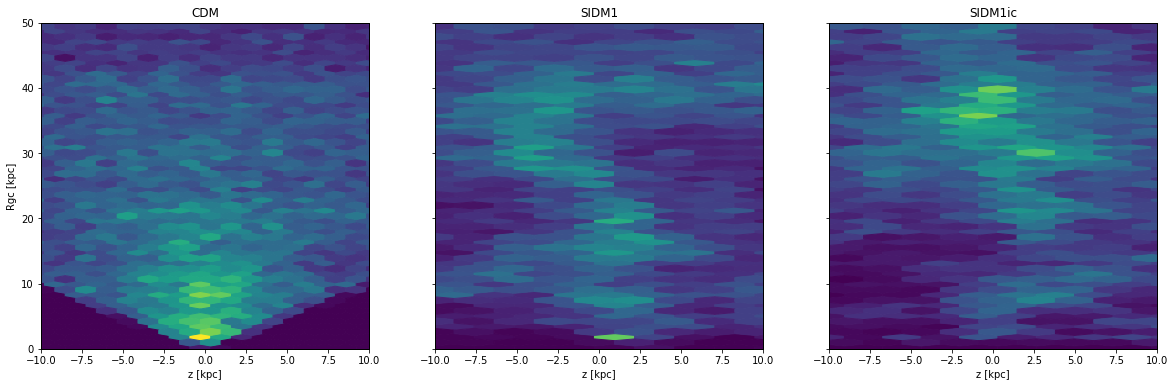

In [109]:
k=19

f, axs = plt.subplots(1, 3, sharey=True, sharex=False,  figsize=(20, 6),)
vmin=0
vmax=100

axs[0].hexbin(cdm_sat[k]['dark']['position'][:,2], cdm_sat[k]['dark']['position.sph'][:,0],gridsize=400, vmin=vmin, vmax=vmax)
axs[0].set_xlim(-10, 10)
axs[0].set_ylim(0, 50)
axs[0].set_ylabel('Rgc [kpc]')
axs[0].set_xlabel('z [kpc]')
axs[0].set_title('CDM', fontsize=12)

axs[1].hexbin(sidm1_sat[k]['dark']['position'][:,2], cdm_sat[k]['dark']['position.sph'][:,0],gridsize=400, vmin=vmin, vmax=vmax)
axs[1].set_xlim(-10, 10)
axs[1].set_ylim(0, 50)
axs[1].set_xlabel('z [kpc]')
axs[1].set_title('SIDM1', fontsize=12)

axs[2].hexbin(sidm1d_sat[k]['dark']['position'][:,2], cdm_sat[k]['dark']['position.sph'][:,0],gridsize=400, vmin=vmin, vmax=vmax)
axs[2].set_xlim(-10, 10)
axs[2].set_ylim(0, 50)
axs[2].set_xlabel('z [kpc]')
axs[2].set_title('SIDM1ic', fontsize=12)

print(str(time_array[k])+ ' Gyr')

NameError: name 'sidm10v_sat' is not defined

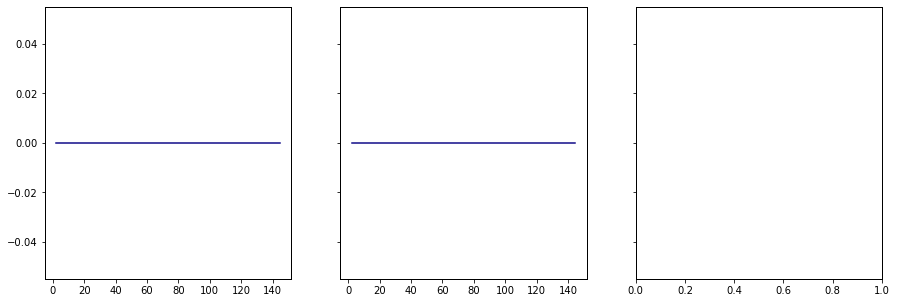

In [11]:
f, axs = plt.subplots(1, 3, sharey=True, sharex=False, figsize=(15, 5),)

sampletimes=[0, 10, 20, 23, 26, 29, 31, 34]

for i in sampletimes:
    
    colors = plt.cm.plasma(np.linspace(0,1,max(sampletimes)+1))

    xlist_CDM1, ylist_CDM1 = make_density_hist(cdm_sat[i]['dark'], 2, 150, 60)
    axs[0].plot(xlist_CDM1, ylist_CDM1, color = colors[i], label=str(round(time_array[i],2)) + ' Gyr', linewidth=1.5)
    
    xlist_SIDM1, ylist_SIDM1 = make_density_hist(sidm1_sat[i]['dark'], 2, 150, 60)
    axs[1].plot(xlist_SIDM1, ylist_SIDM1, color = colors[i], label=str(round(time_array[i],2)) + ' Gyr', linewidth=1.5)
    
    xlist_SIDM10v, ylist_SIDM10v = make_density_hist(sidm10v_sat[i]['dark'], 2, 150, 60)
    axs[2].plot(xlist_SIDM10v, ylist_SIDM10v, color = colors[i], label=str(round(time_array[i],2)) + ' Gyr', linewidth=1.5)

axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[2].set_xscale('log')
axs[0].set_ylim([1e4, 5e8])
axs[0].set_xlabel('$R_{gc}$ [kpc]', fontsize=12)
axs[1].set_xlabel('$R_{gc}$ [kpc]', fontsize=12)
axs[2].set_xlabel('$R_{gc}$ [kpc]', fontsize=12)


axs[0].set_ylabel('Density [M$_\odot$/kpc$^3$]', fontsize=12)
axs[0].set_title('Satellite Dark Matter: CDM', fontsize=13)
axs[1].set_title('Satellate Dark Matter: SIDM1', fontsize=13)
axs[2].set_title('Satellate Dark Matter: SIDM10v', fontsize=13)

axs[0].legend(frameon=False, fontsize=12)

plt.tight_layout()
plt.savefig(plot_directory + '/density_vs_Rgc_sat_DM.pdf')

Text(0, 0.5, 'Density [M$_\\odot$/kpc$^3$]')

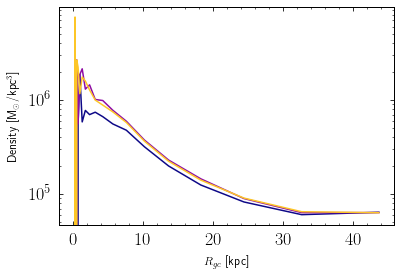

In [30]:
i = 17

sampletimes=[0, 10, 20, 23, 26, 29, 31, 34]

colors = plt.cm.plasma(np.linspace(0,1,max(sampletimes)+1))

rmin=0.2
rmax=50
deltar=20

xlist_CDM1, ylist_CDM1 = make_density_hist(cdm_sat[i]['dark'], rmin, rmax, deltar)
xlist_SIDM1, ylist_SIDM1 = make_density_hist(sidm1_sat[i]['dark'], rmin, rmax, deltar)
xlist_SIDM10v, ylist_SIDM10v = make_density_hist(sidm10v_sat[i]['dark'], rmin, rmax, deltar)
  
plt.plot(xlist_CDM1, ylist_CDM1, color = colors[0], label=str(round(time_array[i],2)) + ' Gyr', linewidth=1.5)
plt.plot(xlist_SIDM1, ylist_SIDM1, color = colors[10], label=str(round(time_array[i],2)) + ' Gyr', linewidth=1.5)
plt.plot(xlist_SIDM10v, ylist_SIDM10v, color = colors[30], label=str(round(time_array[i],2)) + ' Gyr', linewidth=1.5)

plt.yscale('log')
#plt.xscale('log')

#plt.ylim([1e4, 5e8])
plt.xlabel('$R_{gc}$ [kpc]', fontsize=12)
plt.ylabel('Density [M$_\odot$/kpc$^3$]', fontsize=12)

#axs[0].legend(frameon=False, fontsize=12)

#plt.tight_layout()
#plt.savefig(plot_directory + '/density_vs_Rgc_sat_DM.pdf')

In [ ]:
f, axs = plt.subplots(1, 3, sharey=True, sharex=False, figsize=(15, 5),)

sampletimes=[0, 10, 20, 23, 26, 29, 31, 34]

for i in sampletimes:
    
    colors = plt.cm.plasma(np.linspace(0,1,max(sampletimes)+1))

    xlist_CDM1, ylist_CDM1 = make_density_hist(cdm_sat[i]['dark'], 2, 150, 60)
    axs[0].plot(xlist_CDM1, ylist_CDM1, color = colors[i], label=str(round(time_array[i],2)) + ' Gyr', linewidth=1.5)
    
    xlist_SIDM1, ylist_SIDM1 = make_density_hist(sidm1_sat[i]['dark'], 2, 150, 60)
    axs[1].plot(xlist_SIDM1, ylist_SIDM1, color = colors[i], label=str(round(time_array[i],2)) + ' Gyr', linewidth=1.5)
    
    xlist_SIDM10v, ylist_SIDM10v = make_density_hist(sidm10v_sat[i]['dark'], 2, 150, 60)
    axs[2].plot(xlist_SIDM10v, ylist_SIDM10v, color = colors[i], label=str(round(time_array[i],2)) + ' Gyr', linewidth=1.5)

axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[2].set_xscale('log')
axs[0].set_ylim([1e4, 5e8])
axs[0].set_xlabel('$R_{gc}$ [kpc]', fontsize=12)
axs[1].set_xlabel('$R_{gc}$ [kpc]', fontsize=12)
axs[2].set_xlabel('$R_{gc}$ [kpc]', fontsize=12)


axs[0].set_ylabel('Density [M$_\odot$/kpc$^3$]', fontsize=12)
axs[0].set_title('Satellite Dark Matter: CDM', fontsize=13)
axs[1].set_title('Satellate Dark Matter: SIDM1', fontsize=13)
axs[2].set_title('Satellate Dark Matter: SIDM10v', fontsize=13)

axs[0].legend(frameon=False, fontsize=12)

plt.tight_layout()
plt.savefig(plot_directory + '/density_vs_Rgc_sat_DM.pdf')

# Inner Stellar Halo

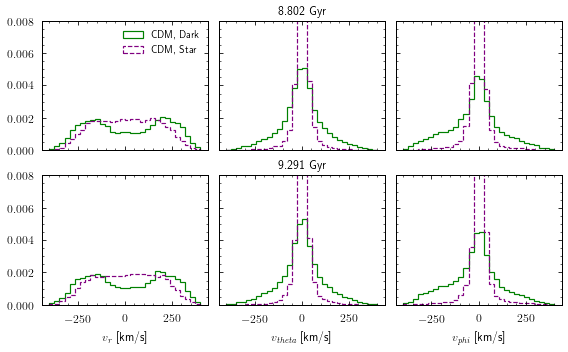

In [75]:
nrows, ncols = 2, 3

mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

f, axs = plt.subplots(nrows, ncols, sharey=True, sharex=True, figsize=(8, 5),)
Rgc_max = 25

for i in [18, 19]:
    
    cdm_mask = (cdm2[i]['dark']['position.sph'][:,0] < Rgc_max)
    cdm_star_mask = (cdm2[i]['star']['position.sph'][:,0] < Rgc_max)
    
    time = (start_time + time_step * i)*unit_time
    
    if i==18:
        j=0
    elif i==19:
        j=1
    
    axs[j, 0].hist(cdm2[i]['dark']['velocity.sph'][:,0][cdm_mask], density=True, bins=30, histtype='step', color='green', range=[-400,400], linewidth=1.2, label='CDM, Dark')
    axs[j, 0].hist(cdm2[i]['star']['velocity.sph'][:,0][cdm_star_mask], density=True, bins=30, histtype='step', color='purple', range=[-400,400], linestyle='dashed', linewidth=1.2, label='CDM, Star')
    if j==0:
        axs[j, 0].legend(frameon=False, fontsize=10)
    
    axs[j, 1].hist(cdm2[i]['dark']['velocity.sph'][:,1][cdm_mask], density=True, bins=30, histtype='step', color='green', range=[-400,400], linewidth=1.2)
    axs[j, 1].hist(cdm2[i]['star']['velocity.sph'][:,1][cdm_star_mask], density=True, bins=30, histtype='step', color='purple', range=[-400,400], linestyle='dashed', linewidth=1.2)
    axs[j, 1].set_title(str(time) + ' Gyr', fontsize=12)
        
    axs[j, 2].hist(cdm2[i]['dark']['velocity.sph'][:,2][cdm_mask], density=True, bins=30, histtype='step', color='green', range=[-400,400], linewidth=1.2)
    axs[j, 2].hist(cdm2[i]['star']['velocity.sph'][:,2][cdm_star_mask], density=True, bins=30, histtype='step', color='purple', range=[-400,400], linestyle='dashed', linewidth=1.2)

    axs[j, 0].set_ylim([0, 0.008])
    
axs[1, 0].set_xlabel('$v_r$ [km/s]', fontsize=12)
axs[1, 1].set_xlabel('$v_{theta}$ [km/s]', fontsize=12)
axs[1, 2].set_xlabel('$v_{phi}$ [km/s]', fontsize=12)
f.tight_layout()
f.savefig(plot_directory + '/inner_halo_cdm_darkstarcomparison.pdf')

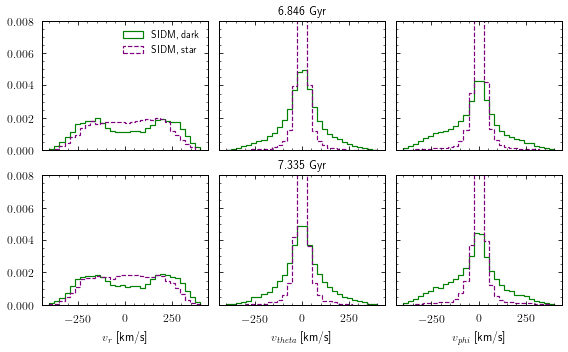

In [76]:
nrows, ncols = 2, 3

mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

f, axs = plt.subplots(nrows, ncols, sharey=True, sharex=True, figsize=(8, 5),)
Rgc_max = 25

for i in [14, 15]:
    
    sidm_mask = (sidm2[i]['dark']['position.sph'][:,0] < Rgc_max)
    sidm_star_mask = (sidm2[i]['star']['position.sph'][:,0] < Rgc_max)
    
    time = (start_time + time_step * i)*unit_time
    
    if i==14:
        j=0
    elif i==15:
        j=1
    
    axs[j, 0].hist(sidm2[i]['dark']['velocity.sph'][:,0][sidm_mask], density=True, bins=30, histtype='step', color='green', range=[-400,400], linewidth=1.2, label='SIDM, dark')
    axs[j, 0].hist(sidm2[i]['star']['velocity.sph'][:,0][sidm_star_mask], density=True, bins=30, histtype='step', color='purple', range=[-400,400], linestyle='dashed', linewidth=1.2, label='SIDM, star')
    
    if j==0:
        axs[j, 0].legend(frameon=False, fontsize=10)
    
    axs[j, 1].hist(sidm2[i]['dark']['velocity.sph'][:,1][sidm_mask], density=True, bins=30, histtype='step', color='green', range=[-400,400], linewidth=1.2)
    axs[j, 1].hist(sidm2[i]['star']['velocity.sph'][:,1][sidm_star_mask], density=True, bins=30, histtype='step', color='purple', range=[-400,400], linestyle='dashed', linewidth=1.2)
    axs[j, 1].set_title(str(time) + ' Gyr', fontsize=12)
        
    axs[j, 2].hist(sidm2[i]['dark']['velocity.sph'][:,2][sidm_mask], density=True, bins=30, histtype='step', color='green', range=[-400,400], linewidth=1.2)
    axs[j, 2].hist(sidm2[i]['star']['velocity.sph'][:,2][sidm_star_mask], density=True, bins=30, histtype='step', color='purple', range=[-400,400], linestyle='dashed', linewidth=1.2)

    axs[j, 0].set_ylim([0, 0.008])
    
axs[1, 0].set_xlabel('$v_r$ [km/s]', fontsize=12)
axs[1, 1].set_xlabel('$v_{theta}$ [km/s]', fontsize=12)
axs[1, 2].set_xlabel('$v_{phi}$ [km/s]', fontsize=12)
f.tight_layout()
f.savefig(plot_directory + '/inner_halo_sidm_darkstarcomparison.pdf')

In [118]:
def potential_plot(ls, limits):
    
    X = ls['position'][:,0]
    Z = ls['position'][:,2]
    W = np.sqrt(-1*ls['potential'][:,])

    H, xedges, yedges = np.histogram2d(X, Z, bins=75, range = limits, weights = W) 
    H = H.T
    
    return H

IndexError: index 200 is out of bounds for axis 0 with size 110

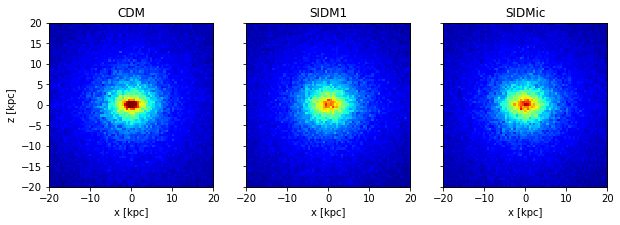

In [120]:
k=10

colors = plt.cm.rainbow(np.linspace(0,1,20))  
limits=np.array([[-20, 20], [-20, 20]])
vmin=1e3
vmax=1e5

Hcdm = potential_plot(cdm_host[k]['dark'], limits)
Hsidm1 = potential_plot(sidm1_host[k]['dark'], limits)
Hsidm1ic = potential_plot(sidm1d_host[k]['dark'], limits)

f, axs = plt.subplots(1, 3, sharey=True, sharex=False, figsize=(10, 5),)

axs[0].imshow(Hcdm, interpolation='nearest', origin='low', aspect=1,vmin = vmin, vmax=vmax,
        extent=[limits[0][0], limits[0][1], limits[1][0], limits[1][1]],cmap=plt.cm.jet) #, norm=colors.LogNorm())

axs[1].imshow(Hsidm1, interpolation='nearest', origin='low', aspect=1,vmin = vmin, vmax=vmax,
        extent=[limits[0][0], limits[0][1], limits[1][0], limits[1][1]],cmap=plt.cm.jet) #, norm=LogNorm())

im = axs[2].imshow(Hsidm1ic, interpolation='nearest', origin='low', aspect=1,vmin = vmin, vmax=vmax,
        extent=[limits[0][0], limits[0][1], limits[1][0], limits[1][1]],cmap=plt.cm.jet) #, norm=LogNorm())

axs[0].set_xlabel('x [kpc]')
axs[0].set_ylabel('z [kpc]')
axs[0].set_title('CDM')

axs[1].set_xlabel('x [kpc]')
#axs[1].set_ylabel('z [kpc]')
axs[1].set_title('SIDM1')

axs[2].set_xlabel('x [kpc]')
#axs[2].set_ylabel('z [kpc]')
axs[2].set_title('SIDMic')

print(str(round(time_array[k*20],2))+ ' Gyr')

9.78 Gyr


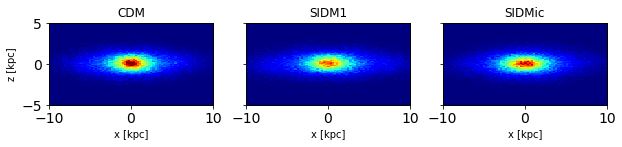

In [117]:
k=5

colors = plt.cm.rainbow(np.linspace(0,1,len(ilist)))  
limits=np.array([[-10, 10], [-5, 5]])
vmin=1e3
vmax=1e5

Hcdm = potential_plot(cdm_host[k]['star'], limits)
Hsidm1 = potential_plot(sidm1_host[k]['star'], limits)
Hsidm1ic = potential_plot(sidm1d_host[k]['star'], limits)


f, axs = plt.subplots(1, 3, sharey=True, sharex=False, figsize=(10, 5),)

axs[0].imshow(Hcdm, interpolation='nearest', origin='low', aspect=1,vmin = vmin, vmax=vmax,
        extent=[limits[0][0], limits[0][1], limits[1][0], limits[1][1]],cmap=plt.cm.jet)

axs[1].imshow(Hsidm1, interpolation='nearest', origin='low', aspect=1,vmin = vmin, vmax=vmax,
        extent=[limits[0][0], limits[0][1], limits[1][0], limits[1][1]],cmap=plt.cm.jet) #, norm=LogNorm())

im = axs[2].imshow(Hsidm1ic, interpolation='nearest', origin='low', aspect=1,vmin =vmin, vmax=vmax,
        extent=[limits[0][0], limits[0][1], limits[1][0], limits[1][1]],cmap=plt.cm.jet) #, norm=LogNorm())

axs[0].set_xlabel('x [kpc]')
axs[0].set_ylabel('z [kpc]')
axs[0].set_title('CDM')

axs[1].set_xlabel('x [kpc]')
#axs[1].set_ylabel('z [kpc]')
axs[1].set_title('SIDM1')

axs[2].set_xlabel('x [kpc]')
#axs[2].set_ylabel('z [kpc]')
axs[2].set_title('SIDMic')

print(str(round(time_array[k*20],2))+ ' Gyr')

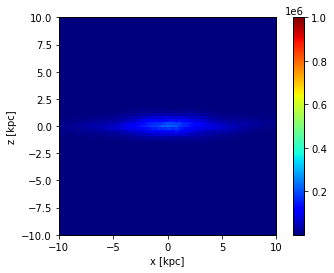

In [68]:
k=0

X = sidm1_host[k]['star']['position'][:,0]
Z = sidm1_host[k]['star']['position'][:,2]
W = np.sqrt(-1*sidm1_host[k]['star']['potential'][:,])

limits=np.array([[-10, 10], [-10, 10]])

H, xedges, yedges = np.histogram2d(X, Z, bins=75, range = limits, weights = W) 
H = H.T

fig, ax = plt.subplots()

im = ax.imshow(H, interpolation='nearest', origin='low', aspect=1,vmin = 1e3, vmax=1e6,
        extent=[limits[0][0], limits[0][1], limits[1][0], limits[1][1]],cmap=plt.cm.jet) #, norm=colors.LogNorm())

ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')

fig.colorbar(im, ax=ax)

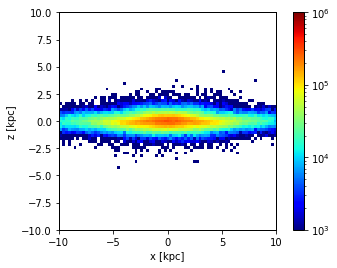

In [132]:
k=0

X = cdm_host[k]['star']['position'][:,0]
Z = cdm_host[k]['star']['position'][:,2]
W = np.sqrt(-1*cdm_host[k]['star']['potential'][:,])

limits=np.array([[-10, 10], [-10, 10]])

H, xedges, yedges = np.histogram2d(X, Z, bins=75, range = limits, weights = W) 
H = H.T

fig, ax = plt.subplots()

im = ax.imshow(H, interpolation='nearest', origin='low', aspect=1,vmin = 1e3, vmax=1e6,
        extent=[limits[0][0], limits[0][1], limits[1][0], limits[1][1]],cmap=plt.cm.jet, norm=colors.LogNorm())

ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')

fig.colorbar(im, ax=ax)